In [ ]:
#! easy_install pip
#! pip install SpellChecker
! pip install pyspellchecker
! pip install wordcloud

In [3]:
import re
import os
from spellchecker import SpellChecker
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from IPython.display import display
from wordcloud import WordCloud, ImageColorGenerator

filespath="C:\\Users\\Administrator\\Desktop\\nls-text-spiritualistNewspaper"

def get_filename(file_dir):
    filenamelist_cleaned=[]
    for root, dirs, files in os.walk(file_dir):
        filenamelist=files
    for file in filenamelist:
        if file[-3:]=='txt' and file[:6]!='readme':
            filenamelist_cleaned.append(file_dir+'\\'+file)
    return filenamelist_cleaned

def check_existdata(path):
    if os.path.exists(path):
        print(path.split('\\')[-1]," Database exists")
        print("reading...")
        print("\n")
        judgement=True
    else:
        print(path.split('\\')[-1]," No Database")
        print("generating...")
        print("\n")
        judgement = False
    return judgement

def read_data(path):
    f = open(path, "r",encoding="UTF8")
    file = f.read()
    f.close()
    return eval(file)

def save_data(path,data):
        f = open(path, "w+",encoding="UTF8")
        file = f.write(str(data))
        f.close()

        print(path.split('\\')[-1]," data is saved")
        print("\n")

def clean_titeltxt(i):
    i = i.replace("¬\n", "")
    i = i.replace("-\n", "")
    i = i.replace("\n", " ")
    i = i.replace("™ ™", "")
    i = i.replace("¬", "—")
    i=i.replace("^","")
    i=i.replace("•","")
    i=i.replace(";","")
    i = i.replace("*", "")
    i = i.replace("?", "")
    i = i.replace("!", "")
    i = i.replace("$", "")
    i = i.replace("/", "")
    i = i.replace("\\", "")
    i = i.replace("■", "")
    i = i.replace("«", "")
    i = i.replace("(", "")
    i = i.replace(")", "")
    i = i.strip()
    i = i.upper()
    if len(i)>=3:
        if i[0] == ",":
            i = i[1:]
        if i[-1] == ",":
            i = i[:-2]
    else:
        i=''
    return i

def get_titles(file,filetail):
    filetail_list = filetail.split('\n')
    fcontenttitles = []
    for i in filetail_list:
        n = re.search("[0-9]", i[-2:])
        if n != None:
            fcontenttitles.append(i)
    if fcontenttitles!=[]:
        fcontenttitle_begin = fcontenttitles[0]
        fcontenttitle_end = fcontenttitles[-1]
        fcontenttitletxt = filetail[
                           filetail.index(fcontenttitle_begin):filetail.index(fcontenttitle_end) + len(
                               fcontenttitle_end)]
        fcontenttitletxt = fcontenttitletxt.replace(".", "")
        fcontenttitletxt = fcontenttitletxt.replace("0", "#")
        fcontenttitletxt = fcontenttitletxt.replace("1", "#")
        fcontenttitletxt = fcontenttitletxt.replace("2", "#")
        fcontenttitletxt = fcontenttitletxt.replace("3", "#")
        fcontenttitletxt = fcontenttitletxt.replace("4", "#")
        fcontenttitletxt = fcontenttitletxt.replace("5", "#")
        fcontenttitletxt = fcontenttitletxt.replace("6", "#")
        fcontenttitletxt = fcontenttitletxt.replace("7", "#")
        fcontenttitletxt = fcontenttitletxt.replace("8", "#")
        fcontenttitletxt = fcontenttitletxt.replace("9", "#")
        fcontenttitlelist = fcontenttitletxt.split("#")
        fcontenttitlelist_2 = []
        for i in fcontenttitlelist:
            i = i.split("—")
            for n in i:
                fcontenttitlelist_2.append(n)

        fcontenttitlelist_cleaned = []
        for i in fcontenttitlelist_2:
            if ("Publish" in i) or ("Month" in i) or ("Fourpence" in i) or ("st and" in i):
                pass
            else:
                if i != "" and len(i) > 2:
                    i = clean_titeltxt(i)
                    fcontenttitlelist_cleaned.append(i)

        # print(filetail)
        # print(filetail_list)
        # print(fcontenttitles)
        # print(fcontenttitletxt)
        #print(fcontenttitlelist_cleaned)

        newstitledict = {}
        newstitledict["NO TOPIC"] = []
        topic = ''
        for title in fcontenttitlelist_cleaned:
            if ":" in title:
                title = title.replace(":", '')
                title = title.strip()
                newstitledict[title] = []
                topic = title
            else:
                if topic == '':
                    newstitledict["NO TOPIC"].append(title)
                else:
                    newstitledict[topic].append(title)
        #for key in newstitledict.keys():
            #print(key + ":")
            #for i in newstitledict[key]:
                #print(i)
        return [file, newstitledict]


def pass_files(path,getinfor_switch):
    f = open(path, 'r', encoding="UTF8")
    file = f.read()
    f.close()

    if getinfor_switch=='END':
        filetail = file[-2000:]
    else:
        if "LONDON" in file[:300]:
            beginindex=file[:300].index("LONDON")+20
            filetail = file[beginindex:2000]
        else:
            filetail = file[200:2000]

    n = re.findall("[0-9]", filetail)
    if len(list(n))>7:
        fileinfo="Done"
        file_titledict=get_titles(file,filetail)
        if file_titledict==None:
            file_titledict=[file,{}]
            fileinfo = "Lack"

    else:
        file_titledict=[file,{}]
        fileinfo = "Lack"
    file_titledict.append(path[-13:])
    file_titledict.append(fileinfo)
    return file_titledict

def match_titlesinfiles(file_fcontenttitlelist_cleaned_list):
    file=file_fcontenttitlelist_cleaned_list[0]
    newstitledict=file_fcontenttitlelist_cleaned_list[1]
    titlelists=[]
    for topic in newstitledict.keys():
        titlelists+=newstitledict[topic]
    print("\n")
    titlesoutcomedict = {}

    for title in titlelists:
        searchoutcome = re.search(title, file)
        if searchoutcome != None:
            titlesoutcomedict[title] = 'Found'
        else:
            titlesoutcomedict[title] = 'Missed'

    return titlesoutcomedict

def check_spelling(wordslist):
    spell = SpellChecker()
    wordslist_new = []
    for words in wordslist:
        # misspelled = spell.unknown(topic)
        words_new = []
        for word in words:
            words_new.append(spell.correction(word).upper())
        wordslist_new.append(words_new)
    return wordslist_new

def divide_word_byalpha(word):
    nonalphaindexs = []
    new_wordlist = []
    index = 0
    if len(word)>0 and re.search("[a-z]|[A-Z]",word)!=None:
        for n in word:
            if n.isalpha() == False:
                nonalphaindexs.append(index)
            index += 1
        if nonalphaindexs!=[]:
            if nonalphaindexs[0] > 0:
                new_wordlist.append(word[:nonalphaindexs[0]])
            i_b = nonalphaindexs[0]
            for i in nonalphaindexs:
                if i > 0 and i != i_b and i - i_b != 1:
                    new_wordlist.append(word[i_b + 1:i])
                new_wordlist.append(word[i])
                i_b = i
            if nonalphaindexs[-1] < len(word) - 1:
                new_wordlist.append(word[nonalphaindexs[-1] + 1:])
        else:
            new_wordlist=word.split(" ")

    else:
        new_wordlist=[]

    return new_wordlist

def check_spelling_titles(wordslist):
    spell = SpellChecker()
    wordslist_new = []
    for words in wordslist:
        words_new = []
        for word in words:
            if word.replace(" ","").isalpha():
                if spell.unknown([word]) != None:
                    words_new.append(spell.correction(word).upper())
                else:
                    words_new.append(word)
            else:
                divided_word=divide_word_byalpha(word)
                for n in divided_word:
                    if n.isalpha():
                        if spell.unknown([n]) != None:
                            word=word.replace(n,spell.correction(n).upper())
                words_new.append(word)



        wordslist_new.append(words_new)

    return wordslist_new

def get_wordslist_fromtitle(titlelist):
    wordslist = []
    for title in titlelist:
        c = title.split()
        wordslist.append(c)
    return wordslist

def get_title_fromwordslist(wordslist):
    titlelist=[]
    for words in wordslist:
        c=" ".join(words)
        titlelist.append(c)
    return titlelist

def replace_topic(topics,new_topics,titledict):
    n=0
    for new_topic in new_topics:
        if new_topic!=topics[n]:
            titledict[new_topic]=titledict.pop(topics[n])
        n+=1
    return titledict

def replace_title(old_topic_titles,new_topic_titles_intxt,dlist,titledict):
    dindexlist=[]
    for d_title in dlist:
        dindexlist.append(new_topic_titles_intxt.index(d_title))
        for key in titledict.keys():
            if old_topic_titles[new_topic_titles_intxt.index(d_title)] in titledict[key]:
                new_dict_value=[]
                for i in titledict[key]:
                    if i==old_topic_titles[new_topic_titles_intxt.index(d_title)]:
                        new_dict_value.append(d_title)
                    else:
                        new_dict_value.append(i)
                titledict[key]=new_dict_value
    return titledict

def get_all_topics(file_titledict,all_topics):
    if file_titledict[3] != "Lack":
        for topic in file_titledict[1].keys():
            if (topic not in all_topics) and len(topic) <= 100:
                all_topics.append(topic)

def correct_topics(file_titledict):
    if file_titledict[3] != "Lack":

        topics = get_wordslist_fromtitle(file_titledict[1].keys())
        print(topics)

        new_topics = check_spelling_titles(topics)
        new_topic_intxt = []
        for topic in new_topics:
            topic_intxt = " ".join(topic)
            new_topic_intxt.append(topic_intxt)
        print(new_topic_intxt)
        file_titledict[1] = replace_topic(list(file_titledict[1].keys()), new_topic_intxt,
                                           file_titledict[1])
        print("correct topics Done")
    else:
        print("correct topics Fail")

    return file_titledict

def correct_titles(file_titledict):
    if file_titledict[3] != "Lack":
        old_topic_titles = []
        for topic_values in list(file_titledict[1].values()):
            old_topic_titles += topic_values
        topic_titles = get_wordslist_fromtitle(old_topic_titles)
        new_topic_titles = check_spelling_titles(topic_titles)
        new_topic_titles_intxt = []
        for title in new_topic_titles:
            title_intxt = " ".join(title)
            new_topic_titles_intxt.append(title_intxt)
        dlist = list(set(new_topic_titles_intxt).difference(set(old_topic_titles)))
        print("corrected titles:",dlist)
        file_titledict[1] = replace_title(old_topic_titles, new_topic_titles_intxt, dlist, file_titledict[1])
        print("correct titles Done")
    else:
        print("correct titles Fail")
    print("\n")

    return file_titledict

def refine_topics(all_file_titledict,all_topics):
    topic_papernum_dict={}
    for topic in all_topics:
        topic_papernum_dict[topic]=0
    index=0

    for file_titledict in all_file_titledict:
        for topic in file_titledict[1].keys():
            titles=[]
            for title in file_titledict[1][topic]:
                if len(title)<75:
                    titles.append(title)
            all_file_titledict[index][1][topic]=titles
        if "LEADERS" in file_titledict[1].keys():
            all_file_titledict[index][1]["LEADER"]=all_file_titledict[index][1].pop("LEADERS")
        if "S PARAGRAPHS" in file_titledict[1].keys():
            all_file_titledict[index][1]["PARAGRAPHS"]=all_file_titledict[index][1].pop("S PARAGRAPHS")
        if "PARAGRAPH" in file_titledict[1].keys():
            all_file_titledict[index][1]["PARAGRAPHS"]=all_file_titledict[index][1].pop("PARAGRAPH")
        if "REVIEWS" in file_titledict[1].keys():
            all_file_titledict[index][1]["REVIEW"]=all_file_titledict[index][1].pop("REVIEWS")
        if "SPIRIT POETRY" in file_titledict[1].keys():
            all_file_titledict[index][1]["POETRY"]=all_file_titledict[index][1].pop("SPIRIT POETRY")
        if "NATIONAL ASSOCIATION OF SPIRITUALISTS" in file_titledict[1].keys():
            all_file_titledict[index][1]["THE NATIONAL ASSOCIATION OF SPIRITUALISTS"]=all_file_titledict[index][1].pop("NATIONAL ASSOCIATION OF SPIRITUALISTS")
        for topic in all_topics:
            if topic in file_titledict[1].keys():
                topic_papernum_dict[topic]+=1

        index+=1

    dellist=[]
    for topic in topic_papernum_dict.keys():
        if topic_papernum_dict[topic]<2:
            dellist.append(topic)
    for i in dellist:
        del topic_papernum_dict[i]

    all_file_titledict = reget_titles_byalltopics(all_file_titledict, list(topic_papernum_dict.keys()))

    dellist = []
    for topic in topic_papernum_dict.keys():
        if "LONDON" in topic:
            dellist.append(topic)
    for i in dellist:
        del topic_papernum_dict[i]

    return [all_file_titledict,topic_papernum_dict]

def reget_titles_byalltopics(all_file_titledict,all_topics):
    file_index=0
    new_all_file_titledict=[]
    for file_titledict in all_file_titledict:
        filetopics_list=[]
        for topic in file_titledict[1].keys():
            filetopics_list.append(topic)
            filetopics_list.extend(file_titledict[1][topic])

        new_titles={}
        for finded_topic in all_topics:
            if finded_topic in filetopics_list:
                new_titles[finded_topic] = []

        current_topic=" "
        for title in filetopics_list:
            if title in new_titles.keys():
                current_topic=title
            else:
                new_titles[current_topic].append(title)
        new_titles_cleaned={}
        for new_topic in new_titles:
            if new_titles[new_topic]!=[]:
                new_titles_cleaned[new_topic]=new_titles[new_topic]
        new_all_file_titledict.append([all_file_titledict[file_index][0], new_titles_cleaned, all_file_titledict[file_index][2],
         all_file_titledict[file_index][3]])
    return new_all_file_titledict

def count_titles_bytopic(all_file_titledict,topic_papernum_list):
    count_titles_bytopic_dict = {}
    for topic in topic_papernum_list:
        count_titles_bytopic_dict[topic] = 0
    for file_titledict in all_file_titledict:
        for topic in topic_papernum_list:
            if topic in file_titledict[1].keys():
                count_titles_bytopic_dict[topic] += len(file_titledict[1][topic])

    return count_titles_bytopic_dict

def process_data():
    getinfor_switch = 'END'
    #getinfor_switch='FRONT'
    filenamelist = get_filename(filespath)
    #filenamelist=["C:\\Users\\Administrator\\Desktop\\nls-text-spiritualistNewspaper\\135908617.txt"]
    all_titledict_list_path = filespath+"\\_all_titledict_dict.txt"
    all_topics_path=filespath+"\\_all_topics_path.txt"

    all_file_titledict=[]
    all_files_dict=[]
    all_titledict_list=[]
    all_topics = []

    if check_existdata(all_titledict_list_path) == False and check_existdata(all_topics_path) == False:
        for i in filenamelist:
            if i[-13:] == "135908656.txt":
                getinfor_switch = 'FRONT'
            if i[-13:] == "136346139.txt":
                getinfor_switch = 'END'
            file_titledict = pass_files(i, getinfor_switch)
            print(file_titledict[2] + ":" + file_titledict[3])
            print("correcting topics...")
            file_titledict = correct_topics(file_titledict)
            get_all_topics(file_titledict, all_topics)
            print("correcting titles...")
            file_titledict = correct_titles(file_titledict)
            all_file_titledict.append(file_titledict)

    else:
        all_titledict_list = read_data(all_titledict_list_path)
        for titledict in all_titledict_list:
            all_file_titledict.append(['',titledict[0],titledict[1],titledict[2]])
        all_topics = read_data(all_topics_path)

    print("all topics in newspaper:",all_topics)
    print("\n")

    refineoutcome=refine_topics(all_file_titledict, all_topics)
    all_file_titledict=refineoutcome[0]
    topic_papernum_dict=refineoutcome[1]
    count_titles_bytopic_dict=count_titles_bytopic(all_file_titledict, list(topic_papernum_dict.keys()))


    save_data(all_topics_path, all_topics)

    all_titledict_list = []
    for titledict in all_file_titledict:
        all_titledict_list.append([titledict[1], titledict[2], titledict[3]])
    save_data(all_titledict_list_path, all_titledict_list)
    
    return [all_file_titledict,topic_papernum_dict,count_titles_bytopic_dict]


processoutcome=process_data()
all_file_titledict=processoutcome[0]
topic_papernum_dict=processoutcome[1]
count_titles_bytopic_dict=processoutcome[2]


combined_dict=topic_papernum_dict.copy()
for topic in combined_dict.keys():
    combined_dict[topic]=[combined_dict[topic],count_titles_bytopic_dict[topic]]
count_titles_dataframe=pd.DataFrame(combined_dict,index=["num of per topic in all newspapers","num of passages about this topic in all newspapers"])

_all_titledict_dict.txt  Database exists
reading...


all topics in newspaper: ['NO TOPIC', 'REPORTS OF MEETINGS', 'GENERAL NEWS', 'LEADERS', 'PARAGRAPHS', 'NEWSPAPER ABUSE', 'LEADER', 'POETRY', 'CORRESPONDENCE', 'NEWSPAPER CRITICISM', 'BOOK NOTICES', 'LECTURE BY MRS HARDING', "SPIRITUALISM ILL A’ANCJCFY OF ' J V LEADER,", 'FNATILJNRL SSTFUCITTION, » \'STFANELFS AT <THE HIMNIAIIW W I ’ Y- WE IFCWTF" -J', 'REPORTS OP MEETINGS', "FAREWELL MEETING TO MR PEEBLES '", 'S PARAGRAPHS', 'PRIVATE STANCES', 'SPIRITUALISM IN BIRMINGHAM', 'PSYCHOLOGICAL PHENOMENA', 'REVIEW', 'MODEM SPIRITUALISM EVIDENCE MEN OF SCIENCE', 'PROFESSOR TYNDALL AT A SPIRIT CIRCLE', '-POETRY', "MESSRS HERNE AND WILLIAMS'S MEDIUMSHIP", 'THE STANCE AT ST PETERSBURG UNIVERSITY', 'MARVELLOUS SPIRITUAL MANIFESTATIONS', 'SPIRITUALISM AT THE ANTHROPOLOGICAL INSTITUTE', 'PHYSICAL MANIFESTATIONS THROUGH THE MEDIUMSHIP OF MESSRS HERE AND WILLIAMS', 'LONDON DAILY CHRONICLE, ATMITENTS SPIRITUALISM AT THE BRITISH ASSOCIATION', 'BISHOP

,NO TOPIC,REPORTS OF MEETINGS,GENERAL NEWS,PARAGRAPHS,LEADER,POETRY,CORRESPONDENCE,BOOK NOTICES,SPIRITUALISM IN BIRMINGHAM,REVIEW,...,TRANSACTIONS OF THE NATIONAL ASSOCIATION OF SPIRITUALISTS,MR BLACKBURN’S SEANCES,"ORIGINAL RESEARCHES IN PSYCHOLOGY BY T P BARKS, BGS",SPIRITUALISM IN INDIA,DR SLADE’S MEDIUMSHIP,THE BRITISH NATIONAL ASSOCIATION OF SPIRITUALISTS,PSYCHOLOGICAL PHENOMENA IN AUSTRALIA AND ELSEWHERE BY FREDERICK SINCLAIR,SPIRITUALISM IN AUSTRALIA,WELL-PROVED CLAIRVOYANCE,SPIRITUALISM IN SOUTH AFRICA
num of per topic in all newspapers,374,6,4,169,15,123,238,2,7,15,...,2,5,2,4,2,20,2,11,2,5
num of passages about this topic in all newspapers,2786,65,28,859,30,275,1557,5,47,94,...,19,21,33,18,4,116,20,40,28,19


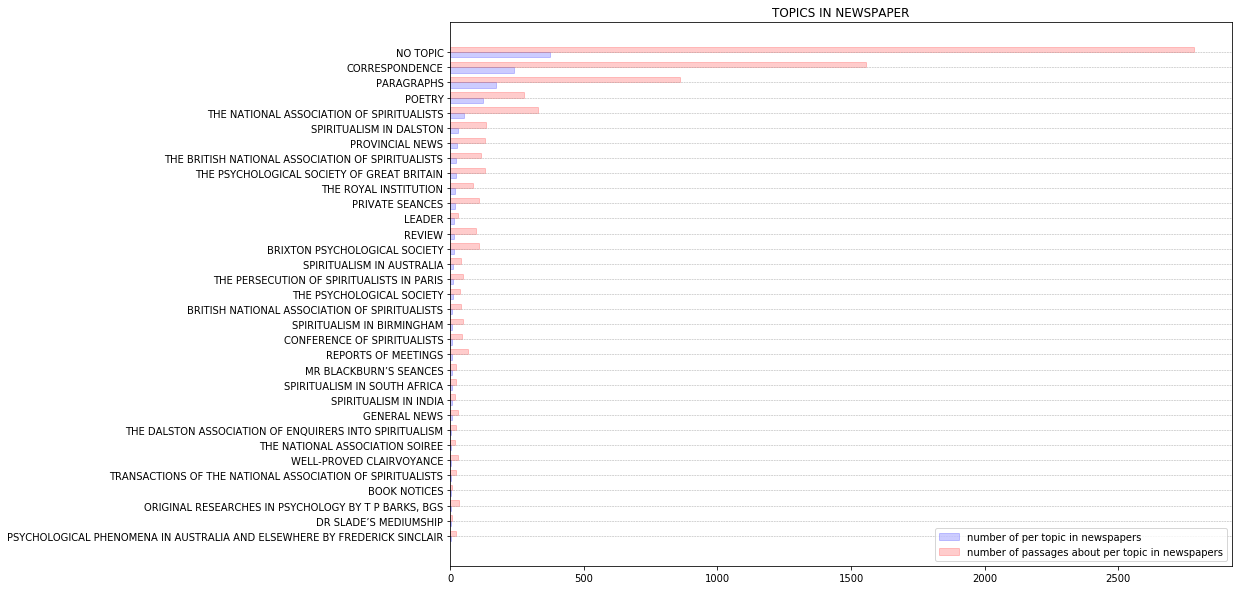

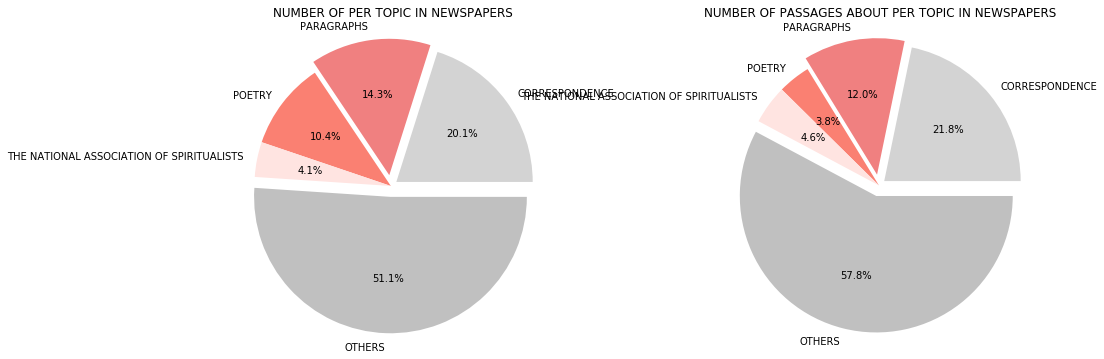

In [4]:
display(count_titles_dataframe)

topic_in_all_series=count_titles_dataframe.loc['num of per topic in all newspapers'].sort_values()
topic_in_all_indexs=list(topic_in_all_series.index)
topic_in_all_values=list(topic_in_all_series)
passages_series=count_titles_dataframe.loc['num of passages about this topic in all newspapers']
passages_indexs=list(passages_series.index)
passages_values=list(passages_series)
passages_indexs_reorder=[]
passages_values_reorder=[]


indexlist=[]
topic_in_all_indexs_originalorder=list(count_titles_dataframe.loc['num of per topic in all newspapers'].index)
for i in topic_in_all_indexs:
    indexlist.append(topic_in_all_indexs_originalorder.index(i))
    
for index in indexlist:
    passages_indexs_reorder.append(passages_indexs[index])
    passages_values_reorder.append(passages_values[index])
    
%matplotlib inline
f, ax = plt.subplots(figsize=(14, 10))
bar_width=0.35
topic_chart = plt.barh(y=range(len(topic_in_all_values)),width=topic_in_all_values,tick_label=topic_in_all_indexs,facecolor='b',edgecolor='b',alpha=0.2,height=bar_width,align='edge',label='number of per topic in newspapers ')
passages_chart = plt.barh(y=np.arange(len(topic_in_all_values))+bar_width,width=passages_values_reorder,tick_label=passages_indexs_reorder,facecolor='r',edgecolor='r',alpha=0.2,height=bar_width,align='edge',label='number of passages about per topic in newspapers')
plt.title("TOPICS IN NEWSPAPER")
plt.legend(loc="lower right")
ax.grid(True, linewidth=0.5, color='#aaaaaa', linestyle='--', axis='y')

plt.show()

fig = plt.subplots(figsize=(16, 6))
plt.subplot(121)
ratios=[topic_in_all_values[-2],topic_in_all_values[-3],topic_in_all_values[-4],topic_in_all_values[-5],np.sum(topic_in_all_values[:-6])+topic_in_all_values[-1]]#存放比例列表
colors=['lightgrey','lightcoral','salmon','mistyrose','silver']
labels=[topic_in_all_indexs[-2],topic_in_all_indexs[-3],topic_in_all_indexs[-4],topic_in_all_indexs[-5],"OTHERS"]
explode=(0.05,0.08,0,0,0.08)
topic_pie=plt.pie(ratios,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('number of per topic in newspapers'.upper())
plt.axis('equal')

plt.subplot(122)
ratios=[passages_values_reorder[-2],passages_values_reorder[-3],passages_values_reorder[-4],passages_values_reorder[-5],np.sum(passages_values_reorder[:-6])+passages_values_reorder[-1]]#存放比例列表
colors=['lightgrey','lightcoral','salmon','mistyrose','silver']
labels=[passages_indexs_reorder[-2],passages_indexs_reorder[-3],passages_indexs_reorder[-4],passages_indexs_reorder[-5],"OTHERS"]
explode=(0.05,0.08,0,0,0.08)
topic_pie=plt.pie(ratios,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('number of passages about per topic in newspapers'.upper())
plt.axis('equal')

plt.show()


In [8]:
def add_topicdata_intodict(topicdatadict,topic,all_file_titledict):
    topicdatadict[topic]=[]
    for file_titledict in all_file_titledict:
        if topic in file_titledict[1].keys():
            topicdatadict[topic].append(len(file_titledict[1][topic]))
        else:
            topicdatadict[topic].append(0)
            
firstfivetopics_dict = {}
add_topicdata_intodict(firstfivetopics_dict,"CORRESPONDENCE",all_file_titledict)
add_topicdata_intodict(firstfivetopics_dict, "PARAGRAPHS", all_file_titledict)
add_topicdata_intodict(firstfivetopics_dict, "POETRY", all_file_titledict)
add_topicdata_intodict(firstfivetopics_dict, "THE NATIONAL ASSOCIATION OF SPIRITUALISTS", all_file_titledict)
data_index=pd.read_csv(filespath+"\\spiritualistNewspaper-inventory.csv")

data_index_list=[str(data_index.columns[1])]+list(data_index[str(data_index.columns[1])])
firstfivetopics_dataframe=pd.DataFrame(data=firstfivetopics_dict,index=data_index_list)

timeline = []
for i in data_index_list[:-2]:
    i=i.split(", ")[1].split(" - ")[0]
    timeline.append(i)
timeline.append(data_index_list[-2].split(" - ")[1].split(", ")[2])
timeline.append(data_index_list[-1].split(" - ")[1].split(", ")[2])

firstfivetopics_dataframe["timeline"]=timeline

#display(firstfivetopics_dataframe)
def dividelist(l, n):
    s=int(len(l)/n)
    return [l[i:i+s] for i in range(len(l)) if i%s==0]
    


def get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,datamark='alldata'):
    #all_file_titledict:all_file_titledict[1]
    all_words_in_alltitles=[]
    all_words_in_alltitles_cleaned = []
    DELETEWORDS="UPON OTHER FREE STREET LONDON DR MR MRS MISS INTO POETRY PARAGRAPH TWO GONE BETWEEN DE THESE DOWN SPIRITUALISM SPIRIT SPIRITS SPIRITUAL SPIRITUALIST SPIRITUALISTS where what when which who whom whoes why how a an the am is are was were been do does did done has have had can could may might must need ought to dare dared shall should will would before given non and with for new from of in by at on with sunday st every one last so our little no more".upper().split()
    
    if datamark=="alldata":
        for file_titledict in all_file_titledict:
            titledict=file_titledict[1]
            for topic in titledict.keys():
                titles=titledict[topic]
                for title in titles:
                    newtitlelist = divide_word_byalpha(title)
                    for i in newtitlelist:
                        if i.isalpha() and len(i)>1:
                            all_words_in_alltitles.append(i)
    else:
        for file_titledict in all_file_titledict:
            titledict=file_titledict[1]
            if datamark in titledict.keys():
                titles=titledict[datamark]
                for title in titles:
                    newtitlelist = divide_word_byalpha(title)
                    for i in newtitlelist:
                        if i.isalpha() and len(i)>1:
                            all_words_in_alltitles.append(i)
    

    for word in all_words_in_alltitles:
        if word in DELETEWORDS:
            pass
        else:
            all_words_in_alltitles_cleaned.append(word)

    wordfrequency_dict={}
    wordfrequency_dict['word']=[]
    wordfrequency_dict['frequency']=[]
    for word in all_words_in_alltitles_cleaned:
        if word in wordfrequency_dict['word']:
            pass
        else:
            wordfrequency_dict['word'].append(word)
            wordfrequency_dict['frequency'].append(all_words_in_alltitles_cleaned.count(word))
    wordfrequency_dataframe=pd.DataFrame(data=wordfrequency_dict)
    wordfrequency_dataframe.sort_values(by='frequency',ascending=False,inplace=True)
    wordfrequency_dataframe.reset_index(drop=True,inplace=True)
    return wordfrequency_dataframe

def show_wordcloud(wfdataframe):
    words=wfdataframe[:100]['word'].tolist()
    counts=wfdataframe[:100]['frequency'].tolist()
    wfdict={}
    index=0
    for word in words:
        wfdict[word]=counts[index]
        index+=1


    plt.figure(figsize = (16, 16), facecolor = None) 
    wordcloud = WordCloud(max_font_size=70, max_words=100,height=400,width=800,background_color="white").fit_words(wfdict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def get_titles_abouttopic(all_file_titledict,topic,titlemark):
    aimedtitlelist=[]
    for file_titledict in all_file_titledict:
            titledict=file_titledict[1]
            if topic in titledict.keys():
                titles=titledict[topic]
                for title in titles:
                    if titlemark in title:
                        aimedtitlelist.append(title)
    return aimedtitlelist

def trans_alltopics_tolist(divided_file_titledict):
    aimedtitlelist = []
    for file_titledict in divided_file_titledict:
        titledict = file_titledict[1]
        for topic in titledict.keys():
            titles = titledict[topic]
            aimedtitlelist.extend(titles)
    return aimedtitlelist

def dispaly_divideddata(disdf, divided_index, timeline, all_file_titledict, topic_papernum_dict, topic):
    for i in list(range(len(divided_index))):
        print(topic, ":", timeline[divided_index[i][0]], " - ", timeline[divided_index[i][-1]])
        # divided_df=firstfivetopics_dataframe.iloc[result[i][0]:result[i][-1]+1]
        # display(divided_df)
        divided_file_titledict = all_file_titledict[divided_index[i][0]:divided_index[i][-1] + 1]
        wf_inalldata_dataframe = get_wordfrequency_dataframe(divided_file_titledict, topic_papernum_dict, topic)
        caught_titles = []
        caught_words = list(wf_inalldata_dataframe["word"])
        if topic == "alldata":
            alltitles_in_divided_file=trans_alltopics_tolist(divided_file_titledict)
            for word in caught_words:
                titles=[]
                for title in alltitles_in_divided_file:
                    if word in title:
                        titles.append(title)
                caught_titles.append(titles)
        else:
            for word in caught_words:
                caught_titles.append(get_titles_abouttopic(divided_file_titledict, topic, word))
        wf_inalldata_dataframe["titles"] = caught_titles

        # show_wordcloud(wf_inalldata_dataframe)
        # print("word frequency about all topics in newspapers".upper())

        display(wf_inalldata_dataframe[:20])
    
#         wf_inalldata_dataframe[:20].to_csv(
#             "C:\\Users\\Administrator\\Desktop\\nls-text-spiritualistNewspaper\\" + topic + "-" + timeline[
#                 divided_index[i][0]] + "-" + timeline[divided_index[i][-1]] + ".csv")


dispaly_divideddata(firstfivetopics_dataframe,[[0,121],[122,330],[331,415]],timeline,all_file_titledict,topic_papernum_dict,"alldata")


alldata : November 19th 1869  -  December 25th 1874


,word,frequency,titles
0,MEDIUMSHIP,110,"[TRANCE MEDIUMSHIP, TRANCE MEDIUMSHIP, SEEING ..."
1,ASSOCIATION,81,"[ST JOHN’S ASSOCIATION OF SPIRITUALISTS, EAST ..."
2,ANSWERS,64,"[ANSWERS TO CORRESPONDENTS, ANSWERS TO CORRESP..."
3,CORRESPONDENTS,59,"[ANSWERS TO CORRESPONDENTS, ANSWERS TO CORRESP..."
4,SOCIETY,54,[SUMMARY OF EVIDENCE GIVEN BEFORE THE DIALECTI...
5,MANIFESTATIONS,51,"[THOUGHT-READING AND PHYSICAL MANIFESTATIONS, ..."
6,NATIONAL,49,[NATIONAL CONFERENCE OF SPIRITUALISTS IN LIVER...
7,SEANCE,46,"[SEANCES AT THE SPIRITUAL LIBRARY, THEY ARE AT..."
8,TRANCE,45,"[TRANCE MEDIUMSHIP, TRANCE MEDIUMSHIP, PROPER ..."
9,JOHN,43,"[SPIRIT-RAPPING IN JOHN WESLEY’S FAMILY, ST JO..."


alldata : January 1st 1875  -  December 28th 1878


,word,frequency,titles
0,SEANCE,127,[A TEST SEANCE AT BRIGHTON BY J N TYDEMAN MART...
1,MANIFESTATIONS,104,[POETRY A SCOTCH POEM ON SPIRITUAL MANIFESTATI...
2,ASSOCIATION,103,"[PUBLIC OFFICES FOR THE NATIONAL ASSOCIATION, ..."
3,MEDIUMSHIP,98,[THE MEDIUMSHIP OF THE EMPEROR VESPASIAN BY ST...
4,SLADE,97,"[SEANCES WITH DR SLADE AND MR FOSTER, TEST <FA..."
5,SEANCES,90,"[SEANCES WITH MR C E WILLIAMS, APARTMENTS FOR ..."
6,PHENOMENA,81,"[MESMERIC PHENOMENA IN LAUSANNE, STRANGE MESME..."
7,NATIONAL,76,"[PUBLIC OFFICES FOR THE NATIONAL ASSOCIATION, ..."
8,PSYCHOLOGICAL,68,"[A PSYCHOLOGICAL SOCIETY, THE NEW PSYCHOLOGICA..."
9,TEST,64,[A TEST SEANCE AT BRIGHTON BY J N TYDEMAN MART...


alldata : January 3rd 1879  -  May 1882


,word,frequency,titles
0,PHENOMENA,38,"[SPIRITUAL PHENOMENA IN GERMANY, SPIRITUAL PHE..."
1,MANIFESTATIONS,30,[THE INFLUENCE OF THE SITTERS UPON MANIFESTATI...
2,DEATH,24,"[DEATH, WHERE IS THY STING” BY EDITH SAVILLE P..."
3,MEDIUMSHIP,24,"[HEALING MEDIUMSHIP, MASTER ROBBERY’S MEDIUMSH..."
4,MUSEUM,21,"[BRITISH MUSEUM LECTURE, J BRITISH MUSEUM LECT..."
5,PSYCHOLOGICAL,20,[THE CONSTITUTION OF THE PSYCHOLOGICAL SOCIETY...
6,HENRY,19,"[HENRY SLADE IN AUSTRALIA, CHANGE OF OPINION B..."
7,SLADE,19,"[HENRY SLADE IN AUSTRALIA, PROFESSOR BALDWIN A..."
8,APPARITION,19,"[OF APPARITIONS' ' ' ""', APPARITIONS OF THE LI..."
9,SEANCE,17,"[SEANCE AT MRS MACDOUGALL GREGORY’S, SEANCE AT..."


In [7]:
def similarwords_frequency(all_file_titledict,aimed_words):
    alltitles=trans_alltopics_tolist(all_file_titledict)
    counter=0
    for word in aimed_words:
        for title in alltitles:
            for word_in_title in title.split(" "):
                if word == word_in_title:
                    counter+=1
    
    return counter

def words_to_similarwords_fre(all_file_titledict,wordsdict):
    counterlist=[]
    for key in wordsdict.keys():
        counterlist.append(similarwords_frequency(all_file_titledict,wordsdict[key]))
    return counterlist

def dispaly_wordsfrequency(divided_index, timeline, all_file_titledict, wordsdict):
    indexlist=[]
    wfslist=[]
    wordsdict_keyslist=list(wordsdict.keys())
    wfdict={}
    for key in wordsdict.keys():
        wfdict[key]=[]
    for i in list(range(len(divided_index))):
        interval=timeline[divided_index[i][0]]+ " - "+timeline[divided_index[i][-1]]
        indexlist.append(interval)
        divided_file_titledict = all_file_titledict[divided_index[i][0]:divided_index[i][-1] + 1]
        wfslist.append(words_to_similarwords_fre(divided_file_titledict,wordsdict))
    for wfs in wfslist:
        for key in wordsdict_keyslist:
            wfdict[key].append(wfs[wordsdict_keyslist.index(key)])
    wordsfrequencyDF=pd.DataFrame(data=wfdict,index=indexlist)
    return wordsfrequencyDF
        

,Female,Male
November 19th 1869 - December 19th 1873,52,96
December 26th 1873 - April 16th 1875,107,137
April 23rd 1875 - August 11th 1876,70,143
August 18th 1876 - December 7th 1877,30,93
December 14th 1877 - April 4th 1879,37,48
April 11th 1879 - July 30th 1880,25,48
March 1882 - May 1882,4,5


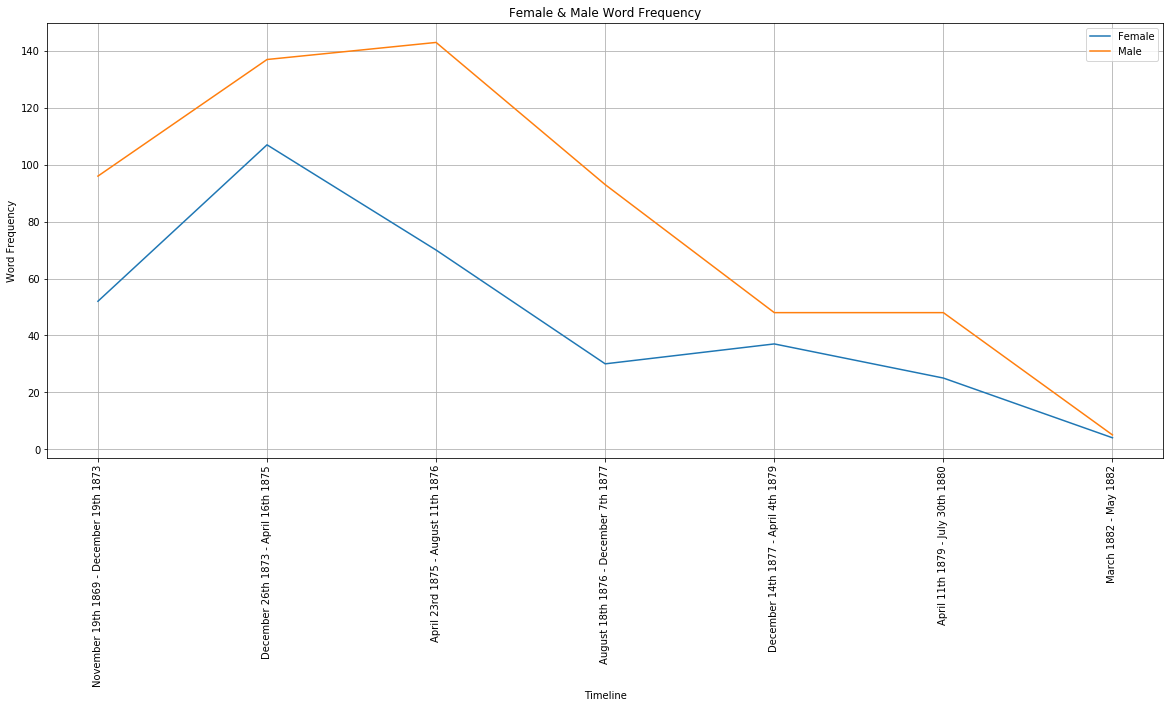

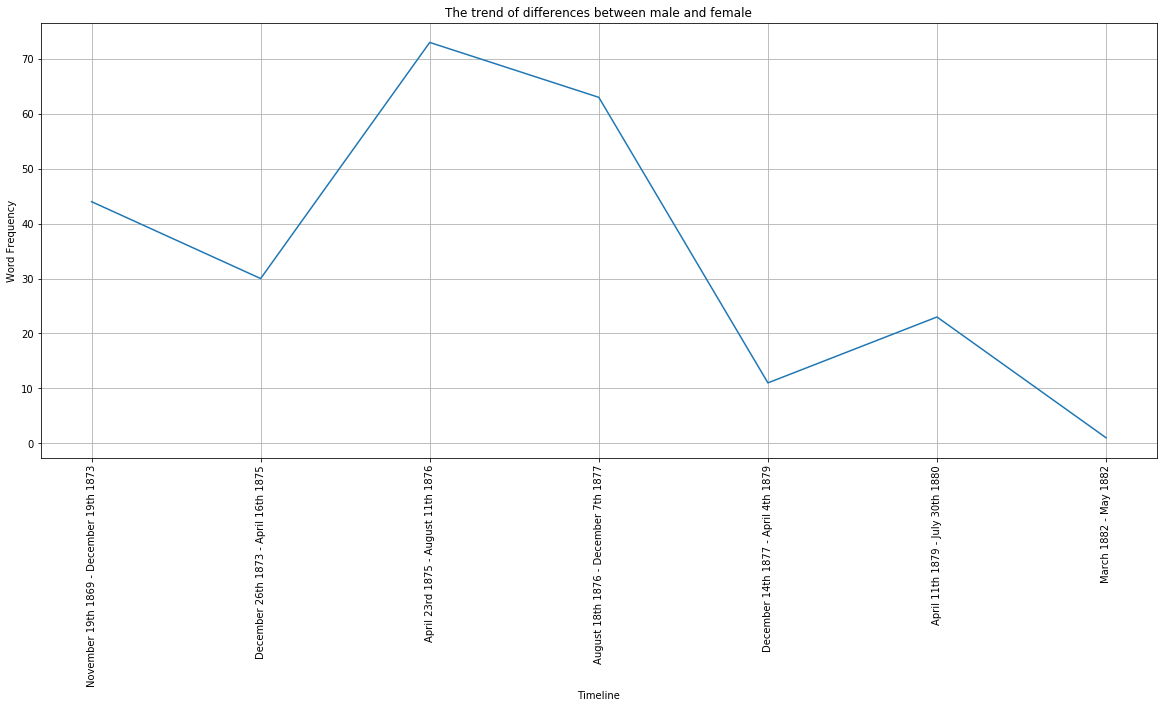

In [15]:
divided_index=dividelist(list(range(len(timeline))),6)
fmWF_DF=dispaly_wordsfrequency(divided_index, timeline, all_file_titledict, {"Female":["MRS","MISS","MISSES","MESDAMES","MADAM","LADY","GIRL","FEMALE","MADAMS","LADIES","GIRLS","FEMALES","WOMAN","WOMEN"],
                                                    "Male":["MESSRS","MR","MAN","MEN"]})

# fig, ax = plt.subplots(4,figsize=(45, 12),sharex=True,sharey=True)

flist=list(fmWF_DF["Female"])
mlist=list(fmWF_DF["Male"])
diflist=[]
for i in flist:
    dif=abs(int(i)-int(mlist[flist.index(i)]))
    diflist.append(dif)
df_DF=pd.DataFrame(data={"difference between male and female":diflist},index=fmWF_DF.index)

display(fmWF_DF)

fig,ax = plt.subplots(figsize=(20, 8))
plt.plot(fmWF_DF["Female"],label="Female")
plt.plot(fmWF_DF["Male"],label="Male")

plt.xlabel('Timeline')
plt.ylabel('Word Frequency')
ax.set_xticklabels(labels=fmWF_DF.index,rotation=90)
plt.legend()
plt.title('Female & Male Word Frequency')

plt.grid()
plt.show()

fig,ax = plt.subplots(figsize=(20, 8))
plt.plot(df_DF["difference between male and female"])

plt.xlabel('Timeline')
plt.ylabel('Word Frequency')
ax.set_xticklabels(labels=fmWF_DF.index,rotation=90)
plt.title('The trend of differences between male and female')

plt.grid()
plt.show()

,IDENTITY,HEALING
November 19th 1869 - December 19th 1873,14,7
December 26th 1873 - April 16th 1875,20,5
April 23rd 1875 - August 11th 1876,11,13
August 18th 1876 - December 7th 1877,3,11
December 14th 1877 - April 4th 1879,11,13
April 11th 1879 - July 30th 1880,5,7
March 1882 - May 1882,0,0


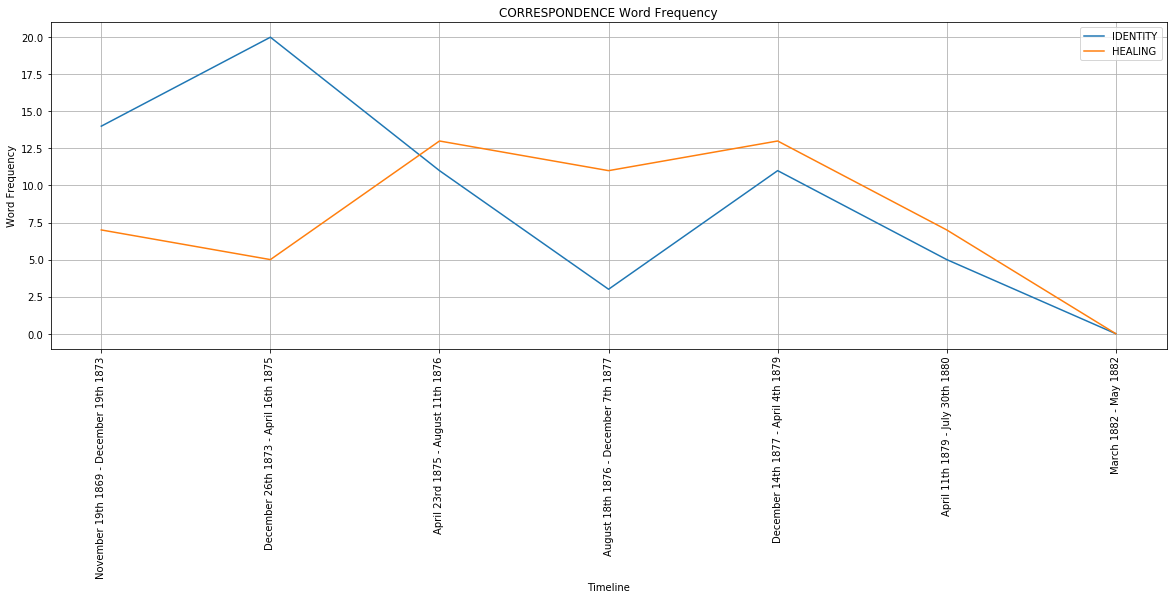

In [16]:
fmWF_DF=dispaly_wordsfrequency(divided_index, timeline, all_file_titledict, {"IDENTITY":["IDENTITY"],
                                                    "HEALING":["HEALING"]})

# fig, ax = plt.subplots(4,figsize=(45, 12),sharex=True,sharey=True)

display(fmWF_DF)

fig,ax = plt.subplots(figsize=(20, 6))
plt.plot(fmWF_DF["IDENTITY"],label="IDENTITY")
plt.plot(fmWF_DF["HEALING"],label="HEALING")

plt.xlabel('Timeline')
plt.ylabel('Word Frequency')
ax.set_xticklabels(labels=fmWF_DF.index,rotation=90)
plt.legend()
plt.title('CORRESPONDENCE Word Frequency')

plt.grid()
plt.show()

In [90]:
def get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,datamark='alldata'):
    #all_file_titledict:all_file_titledict[1]
    all_words_in_alltitles=[]
    all_words_in_alltitles_cleaned = []
    DELETEWORDS="where what when which who whom whoes why how a an the am is are was were been do does did done has have had can could may might must need ought to dare dared shall should will would before given non and with for new from of in by at on with sunday st every one last so our little".upper().split()
    
    if datamark=="alldata":
        for file_titledict in all_file_titledict:
            titledict=file_titledict[1]
            for topic in titledict.keys():
                titles=titledict[topic]
                for title in titles:
                    newtitlelist = divide_word_byalpha(title)
                    for i in newtitlelist:
                        if i.isalpha() and len(i)>1:
                            all_words_in_alltitles.append(i)
    else:
        for file_titledict in all_file_titledict:
            titledict=file_titledict[1]
            if datamark in titledict.keys():
                titles=titledict[datamark]
                for title in titles:
                    newtitlelist = divide_word_byalpha(title)
                    for i in newtitlelist:
                        if i.isalpha() and len(i)>1:
                            all_words_in_alltitles.append(i)
    

    for word in all_words_in_alltitles:
        if word in DELETEWORDS:
            pass
        else:
            all_words_in_alltitles_cleaned.append(word)

    wordfrequency_dict={}
    wordfrequency_dict['word']=[]
    wordfrequency_dict['frequency']=[]
    for word in all_words_in_alltitles_cleaned:
        if word in wordfrequency_dict['word']:
            pass
        else:
            wordfrequency_dict['word'].append(word)
            wordfrequency_dict['frequency'].append(all_words_in_alltitles_cleaned.count(word))
    wordfrequency_dataframe=pd.DataFrame(data=wordfrequency_dict)
    wordfrequency_dataframe.sort_values(by='frequency',ascending=False,inplace=True)
    wordfrequency_dataframe.reset_index(drop=True,inplace=True)
    return wordfrequency_dataframe

def show_wordcloud(wfdataframe):
    words=wfdataframe[:100]['word'].tolist()
    counts=wfdataframe[:100]['frequency'].tolist()
    wfdict={}
    index=0
    for word in words:
        wfdict[word]=counts[index]
        index+=1


    plt.figure(figsize = (16, 16), facecolor = None) 
    wordcloud = WordCloud(max_font_size=70, max_words=100,height=400,width=800,background_color="white").fit_words(wfdict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


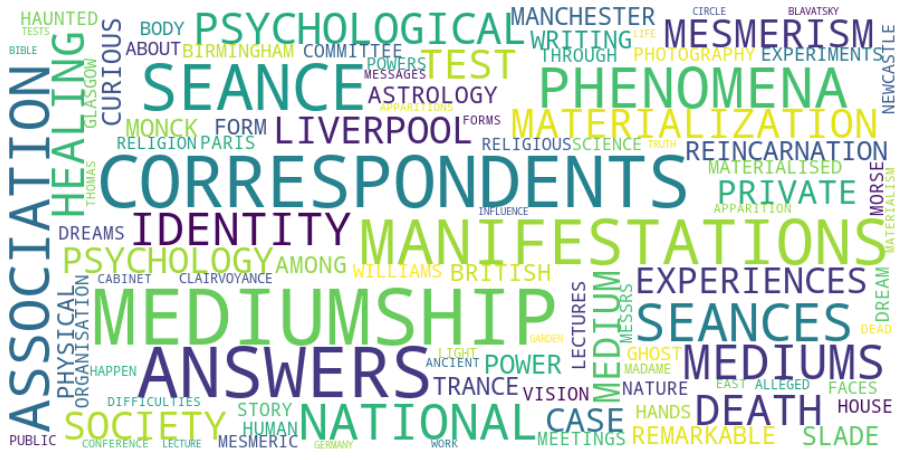

WORD FREQUENCY ABOUT CORRESPONDENCE IN NEWSPAPERS


,word,frequency
0,MEDIUMSHIP,67
1,CORRESPONDENTS,56
2,ANSWERS,55
3,SEANCE,44
4,MANIFESTATIONS,42
5,PHENOMENA,35
6,ASSOCIATION,34
7,SEANCES,31
8,NATIONAL,29
9,MEDIUMS,26


In [88]:
wf_CORRESPONDENCE_dataframe=get_wordfrequency_dataframe(all_file_titledict,topic_papernum_dict,"CORRESPONDENCE")
show_wordcloud(wf_CORRESPONDENCE_dataframe)
print("word frequency about CORRESPONDENCE in newspapers".upper())
display(wf_CORRESPONDENCE_dataframe[:20])


In [91]:
def get_wordfrequency_fromlist(datalist):
    all_words_in_alltitles=[]
    all_words_in_alltitles_cleaned = []
    DELETEWORDS="UPON OTHER FREE STREET LONDON DR MR MRS MISS INTO POETRY PARAGRAPH TWO GONE BETWEEN DE THESE DOWN SPIRITUALISM SPIRIT SPIRITS SPIRITUAL SPIRITUALIST SPIRITUALISTS where what when which who whom whoes why how a an the am is are was were been do does did done has have had can could may might must need ought to dare dared shall should will would before given non and with for new from of in by at on with sunday st every one last so our little no more".upper().split()
    
    for title in datalist:
        newtitlelist = divide_word_byalpha(title)
        for i in newtitlelist:
            if i.isalpha() and len(i)>1:
                all_words_in_alltitles.append(i)

    for word in all_words_in_alltitles:
        if word in DELETEWORDS:
            pass
        else:
            all_words_in_alltitles_cleaned.append(word)

    wordfrequency_dict={}
    wordfrequency_dict['word']=[]
    wordfrequency_dict['frequency']=[]
    for word in all_words_in_alltitles_cleaned:
        if word in wordfrequency_dict['word']:
            pass
        else:
            wordfrequency_dict['word'].append(word)
            wordfrequency_dict['frequency'].append(all_words_in_alltitles_cleaned.count(word))
    wordfrequency_dataframe=pd.DataFrame(data=wordfrequency_dict)
    wordfrequency_dataframe.sort_values(by='frequency',ascending=False,inplace=True)
    wordfrequency_dataframe.reset_index(drop=True,inplace=True)
    return wordfrequency_dataframe

def add_titles_to_wordfrequencyDF_fromlist(datalist,dataDF):
    all_titles_matched=[]
    for caught_word in list(dataDF["word"]):
        caught_titles=[]
        for title in datalist:
            if caught_word in title:
                caught_titles.append(title)
        all_titles_matched.append(caught_titles)
        
    dataDF["titles"] = all_titles_matched
    display(dataDF[:20])

datalist1=['TRANCE MEDIUMSHIP', 'TRANCE MEDIUMSHIP', 'SEEING MEDIUMSHIP', 'MEDIUMSHIP', 'SEEING MEDIUMSHIP', 'PROPER NAMES IN TRANCE-MEDIUMSHIP', '-PROPER NAMES AND TRANCE-MEDIUMSHIP', 'A FEATURE OF TRANCE-MEDIUMSHIP', 'MRS EVERITT’S MEDIUMSHIP', 'MEDIUMSHIP IN THE DAYS OF MOSES', 'SEEING MEDIUMSHIP', 'MRS MARSHALL’S MEDIUMSHIP,', 'SEEING MEDIUMSHIP', 'DR NEWTON’S HEALING MEDIUMSHIP', "MRS MARSHALL'S MEDIUMSHIP,'", 'DR NEWTON’S HEALING MEDIUMSHIP', 'DR NEWTON’S HEALING MEDIUMSHIP', '’ MANIFESTATIONS THROUGH MR HOME’S MEDIUMSHIP', "MRS GUPPY'S MEDIUMSHIP", 'SEEING MEDIUMSHIP', 'MR MORSE’S , MEDIUMSHIP', 'SEEING MEDIUMSHIP', 'COMPRESSIONAL MEDIUMSHIP', 'TRANCE-MEDIUMSHIP EXTRAORDINARY', 'MR TOWNS’S MEDIUMSHIP', "SEEING MEDIUMSHIP,'", 'MISS KATE STOKES’S MEDIUMSHIP TABLE LEVITATION', 'MESSRS HERE AND WILLIAM’S MEDIUMSHIP', "MESSRS HERNE AND WILLIAMS'S MEDIUMSHIP", 'MR WILLIAMS’S MEDIUMSHIP', "MR HERE'S MEDIUMSHIP", 'PHYSICAL MANIFESTATIONS THROUGH THE MEDIUMSHIP OF MESSRS HERE AND WILLIAMS', 'SEEING MEDIUMSHIP', 'HOW JOHN KING FIRST SPOKE THROUGH MR WILLIAMS’S MEDIUMSHIP', 'MRS GUPPY’S MEDIUMSHIP', 'MISS FOWLER’S MEDIUMSHIP', 'MRS BASSETT’S MEDIUMSHIP', 'MISS KATE FOX’S MEDIUMSHIP S', "MISS KATE FOX'S MEDIUMSHIP", 'MRS GUPPY’S MEDIUMSHIP', "MESSRS HERNE AND WILLIAMS'S MEDIUMSHIP", 'MEDIUMSHIP', 'MESSRS HERE AND WILLIAMS’S MEDIUMSHIP', 'MR J J MORSE’S MEDIUMSHIP', 'HEALING MEDIUMSHIP THE EFFICACY OF PRAYER', 'MISS FLORENCE COOK’S MEDIUMSHIP', 'MRS HOLMES’S MEDIUMSHIP', 'MANIFESTATIONS THROUGH MISS KATIE FOX’S MEDIUMSHIP BY ENCORE JONES', 'MR J J MORSE’S MEDIUMSHIP', 'MISS REEVES’ TRANCEMEDIUMSHIP THE SHAM GHOST-PICTURES AGAIN', 'STARTLING SPIRITUAL MANIFESTATIONS SI HEALING MEDIUMSHIP', 'MRS JENNIE HOLMES’S MEDIUMSHIP', 'MRS,HOLMES’S MEDIUMSHIP I', 'MRS ANDREW’S MEDIUMSHIP {', 'REPORT ON THE MEDIUMSHIP OF MR DAVID DUGUIT', 'THE MEDIUMSHIP OF MR THOMAS EAVES', 'MR BEGAN-EGERTON’S MEDIUMSHIP', 'MR FOSTER’S MEDIUMSHIP', 'A TEST SEANCE MEDIUMSHIP AND INSANITY MR KINGSLEY’S MEDIUMSHIP', 'MEDIUMSHIP OF AN ARCHBISHOP OF CANTERBURY', 'MISS LOTTIE FOWLER’S MEDIUMSHIP', 'CERTAIN PROBLEMS CONNECTED WITH MEDIUMSHIP', 'MEDIUMSHIP OF A BAB', 'MEDIUMSHIP OF A BABY', 'TRANCE MEDIUMSHIP AND PHYSICS', 'MADAME LOUISE’S MEDIUMSHIP', 'MRS HENCKE’S MEDIUMSHIP', 'THE DEVELOPMENT OF MEDIUMSHIP AT HOME', 'MATERIALIZATION THROUGH THE MEDIUMSHIP OF MISS SHOWERS _', 'TRANCE AT,D CLAIRVOYANT MEDIUMSHIP', 'MISS LOTTIE FOWLERS’MEDIUMSHIP', 'MISS SHOWER’S MEDIUMSHIP', 'MADAME LOUISE’S MEDIUMSHIP', 'CONDITIONS INFLUENCING WRITING MEDIUMSHIP', 'MRS EVERITT’S MEDIUMSHIP SEANCE AT PROFESSOR BUTLER’S, ST PETERSBURG', 'MR HOME’S MEDIUMSHIP', 'MISS LOTTIE FOWLER’S MEDIUMSHIP', 'PAINTING AND CLAIRVOYANT MEDIUMSHIP', "SEANCE AT MR LUXMOORE’S, MRS JENCKS’S MEDIUM SHIP MRS BIRD'SMEDIUMSHIP", 'MISS LOTTIE FOWLER’S MEDIUMSHIP', 'MISS LOTTIE FOWLER’S MEDIUMSHIP', 'MR DAVID DUGUIT’S PAINTING MEDIUMSHIP', 'MISTOOK’S MEDIUMSHIP', 'TRANCE AND CLAIRVOYANT MEDIUMSHIP', 'MRS BIRD’S MEDIUMSHIP', 'MRS DICKINSON’S MEDIUMSHIP', 'MISS LOTTIE FOWLER’S MEDIUMSHIP', 'MISS SHOWERS’ MEDIUMSHIP', 'MEDIUMSHIP AND THE LUNACY LAWS', 'MISS LOTTIE FOWLER’S MEDIUMSHIP', 'MISS COOK’S MEDIUMSHIP', 'THE MEDIUMSHIP OF MISS SHOWERS', 'MISS SHOWERS’S MEDIUMSHIP BY WILLIAM CROOKES FRS', 'MISS COOK’S MEDIUMSHIP BY S', 'WRITING MEDIUMSHIP OF A BAB', 'MOHAMMED’S MEDIUMSHIP', 'THE MEDIUMSHIP OF MOHAMMED', 'SUPPOSED INFLUENCE UPON MEDIUMSHIP OF THE DEATH OF FRIENDS OF THE MEDIUM', 'SWEDENBORG’S MEDIUMSHIP', 'MATERIALISED SPIRITS THROUGH MISS SHOWERS’ MEDIUMSHIP BY J C LUXMOORE, JP', 'MR MEEK’S MEDIUMSHIP', "SEANCES IN DERBYSHIRE THROUGH MRS EVERITT'S MEDIUMSHIP", 'MISS YOUNG’S TRANCE MEDIUMSHIP', 'MISS REEVES’ TRANCE MEDIUMSHIP', 'MR WEBSTER’S TRANCE MEDIUMSHIP', "ENNESFALLEN'S MEDIUMSHIP", 'MRS FREEHOLD’S MEDIUMSHIP', 'MISS LOTTIE FOWLER’S MEDIUMSHIP', 'ENNESFALLEN’S MEDIUMSHIP', 'THE MEDIUMSHIP OF MISS SHOWERS', 'THE MEDIUMSHIP OF THE EDDY BROTHERS']

add_titles_to_wordfrequencyDF_fromlist(datalist1,get_wordfrequency_fromlist(datalist1))

,word,frequency,titles
0,MEDIUMSHIP,110,"[TRANCE MEDIUMSHIP, TRANCE MEDIUMSHIP, SEEING ..."
1,TRANCE,12,"[TRANCE MEDIUMSHIP, TRANCE MEDIUMSHIP, PROPER ..."
2,FOWLER,8,"[MISS FOWLER’S MEDIUMSHIP, MISS LOTTIE FOWLER’..."
3,SEEING,8,"[SEEING MEDIUMSHIP, SEEING MEDIUMSHIP, SEEING ..."
4,LOTTIE,8,"[MISS LOTTIE FOWLER’S MEDIUMSHIP, MISS LOTTIE ..."
5,THROUGH,7,[’ MANIFESTATIONS THROUGH MR HOME’S MEDIUMSHIP...
6,WILLIAMS,6,"[MESSRS HERNE AND WILLIAMS'S MEDIUMSHIP, MR WI..."
7,SHOWERS,6,[MATERIALIZATION THROUGH THE MEDIUMSHIP OF MIS...
8,MESSRS,5,"[MESSRS HERE AND WILLIAM’S MEDIUMSHIP, MESSRS ..."
9,HEALING,5,"[DR NEWTON’S HEALING MEDIUMSHIP, DR NEWTON’S H..."


In [92]:
datalist1=['ST JOHN’S ASSOCIATION OF SPIRITUALISTS', 'EAST LONDON ASSOCIATION OF SPIRITUALISTS', 'EAST LONDON ASSOCIATION OF SPIRITUALISTS', 'ST JOHN’S ASSOCIATION OF SPIRITUALISTS', 'EAST LONDON ASSOCIATION OF SPIRITUALISTS', "JOHN'S ASSOCIATION OF SPIRITUALISTS", 'ST JOHN’S ASSOCIATION OF SPIRITUALISTS', 'ST JOHN’S ASSOCIATION OF SPIRITUALIST', 'THE BRITISH ASSOCIATION AT LIVERPOOL', 'SPIRITUALISM AT THE BRITISH ASSOCIATION', 'ST JOHN’S ASSOCIATION OF SPIRITUALISTS', "ST JOHN’S ASSOCIATION OF SPIRITUALISTS ' ' ''", 'LONDON DAILY CHRONICLE, ATMITENTS SPIRITUALISM AT THE BRITISH ASSOCIATION', "THE BRITISH ASSOCIATION S '‘‘JF,®’", 'THE BRITISH ASSOCIATION', 'ST JOHN’S ASSOCIATION OF SPIRITUALISTS', "' ST JOHN’S ASSOCIATION OF SPIRITUALISTS", 'ST JOHN’S ASSOCIATION OF SPIRITUALISTS', "ST JOHN'S ASSOCIATION OF SPIRITUALISTS", 'THE BRITISH ASSOCIATION', 'ST JOHN’S ASSOCIATION SPIRITUALISTS', 'DALSTON ASSOCIATION OF ENQUIRERS INTO SPIRITUALISM', 'ST JOHN’S ASSOCIATION OF SPIRITUALIST', 'DALSTON ASSOCIATION OF ENQUIRERS INTO SPIRITUALISM', 'ST JOHN’S ASSOCIATION OF SPIRITUALIST', 'THE BRITISH ASSOCIATION', 'THE DALSTON ASSOCIATION', 'THE BRITISH ASSOCIATION AT BRADFORD', 'ST JOHN’S ASSOCIATION OF SPIRITUALIST', 'THE NATIONAL ASSOCIATION OF SPIRITUALIST', 'THE DALSTON ASSOCIATION', 'DALSTON ASSOCIATION OF ENQUIRERS INTO SPIRITUALIST', 'MEETING OF THE DALSTON ASSOCIATION', 'ST JOHN’S ASSOCIATION OF SPIRITUALIST', 'THE NATIONAL ASSOCIATION', "THE'DALSTON ASSOCIATION", 'THE NATIONAL ASSOCIATION', 'A CHALLENGE NATIONAL ASSOCIATION', "ST JOHN'S ASSOCIATION OF SPIRITUALISTS", 'WORK DONE BY THE ST JOHN’S ASSOCIATION', 'THE NATIONAL ASSOCIATION', 'EVENING CONCERT OF THE MARYLEBONE ASSOCIATION', 'THE BRITISH NATIONAL ASSOCIATION OF SPIRITUALIST', 'THE ST JOHN’S ASSOCIATION OF SPIRITUALISTS', 'THE NATIONAL ASSOCIATION', 'THE SOIREE OF THE NATIONAL ASSOCIATION', "THE SOIREE OF THE NATIONAL ASSOCIATION '", 'THE NATIONAL ASSOCIATION SORE', 'THE NATIONAL ASSOCIATION', 'THE NATIONAL ASSOCIATION', 'THE NATIONAL ASSOCIATION', 'DALSTON ASSOCIATION OF ENQUIRERS INTO SPIRITUALISM', 'LUNACY LAW REFORM ASSOCIATION', 'ST JOHN’S ASSOCIATION OF SPIRITUALISTS BY HE INCARNATION,’’', 'THE NATIONAL ASSOCIATION', 'THE NATIONAL ASSOCIATION', 'THE PROSPECTUS OF THE NATIONAL ASSOCIATION', 'BRITISH NATIONAL ASSOCIATION', 'DALSTON ASSOCIATION OF ENQUIRERS INTO SPIRITUALISM', 'FRIENDLY ALLIANCE WITH THE NATIONAL ASSOCIATION', 'THE BRITISH ASSOCIATION AT BELFAST', 'THE DALSTON ASSOCIATION', 'THE BRITISH ASSOCIATION AT BELFAST', 'THE BRITISH ASSOCIATION AT BELFAST', 'BRITISH NATIONAL ASSOCIATION OF SPIRITUALIST', "PROFESSOR TYNDALL'S ADDRESS TO THE BRITISH ASSOCIATION", "THE DALSTON ASSOCIATION AND NATIONAL ORGANISATION'H", 'NATIONAL ASSOCIATION ’', 'COUNCIL MEETING OF THE NATIONAL ASSOCIATION', 'OFFICES FOR THE NATIONAL ASSOCIATION', 'OFFICES FOR THE NATIONAL ASSOCIATION', 'MEETING IN MARYLEBONE ON NATIONAL ASSOCIATION', "THE NATIONAL ASSOCIATION OF SPIRITUALISTS '", 'THE NATIONAL ASSOCIATION SORT', 'OFFICES FOR THE NATIONAL ASSOCIATION', 'THE [AVOIDANCE OF DEBT BY THE ASSOCIATION', 'DARLINGTON SPIRITUAL ASSOCIATION', 'OFFICES FOR THE NATIONAL ASSOCIATION', 'MR MARTIN SMITH ON THE WORK OF THE NATIONAL ASSOCIATION', 'OFFICES FOR THE NATIONAL ASSOCIATION', 'DALSTON ASSOCIATION']

add_titles_to_wordfrequencyDF_fromlist(datalist1,get_wordfrequency_fromlist(datalist1))

,word,frequency,titles
0,ASSOCIATION,81,"[ST JOHN’S ASSOCIATION OF SPIRITUALISTS, EAST ..."
1,NATIONAL,31,"[THE NATIONAL ASSOCIATION OF SPIRITUALIST, THE..."
2,JOHN,20,"[ST JOHN’S ASSOCIATION OF SPIRITUALISTS, ST JO..."
3,BRITISH,15,"[THE BRITISH ASSOCIATION AT LIVERPOOL, SPIRITU..."
4,DALSTON,12,[DALSTON ASSOCIATION OF ENQUIRERS INTO SPIRITU...
5,OFFICES,5,"[OFFICES FOR THE NATIONAL ASSOCIATION, OFFICES..."
6,ENQUIRERS,5,[DALSTON ASSOCIATION OF ENQUIRERS INTO SPIRITU...
7,BELFAST,3,"[THE BRITISH ASSOCIATION AT BELFAST, THE BRITI..."
8,MEETING,3,"[MEETING OF THE DALSTON ASSOCIATION, COUNCIL M..."
9,EAST,3,"[EAST LONDON ASSOCIATION OF SPIRITUALISTS, EAS..."


In [93]:
datalist1=['A TEST SEANCE AT BRIGHTON BY J N TYDEMAN MARTHEZE', 'A SEANCE WITH MIES LOTTIE FOWLER', 'AN EXTRAORDINARY TEST SEANCE', 'SEANCES WITH MR C E WILLIAMS', 'A MATERIALIZATION SEANCE', 'SEANCE AT MISS DOUGLAS’S', 'SEANCE AT MR GEORGE NEVILLE’S', 'SEANCE WITH MRS FAY IN THE PRESENCE OF MR BLACKBURN AND FRIENDS', 'APARTMENTS FOR SEANCES WANT', 'SEANCE WITH MRS COMER FLORENCE COOK', 'PRIVATE SEANCES IN MANCHESTER', 'A SEANCE WITH SECULARISTS AT BIRMINGHAM', 'MR HARRISON’S FIRST SEANCE', 'DISTURBANCES AT A PUBLIC SEANCE ILL PRIVATE SEANCES', 'A TEST SEANCE WITH MR BLACKBURN THROUGH THE MEDIUMSHIP OF MR WILLIAMS', 'SEANCE AT MRS MACDOUGALL GREGORY’S', 'A TEST SEANCE WITH MISS SHOWERS', 'SEANCE AT MISS DOUGLAS’S', 'A GOOD TEST SEANCE WITH MR WILLIAMS, PROVING THE FACT OF MATERIALIZATION "', 'A REMARKABLE TEST SEANCE IN BRISTOL', 'A REMARKABLE SEANCE WITH MR HOME', '-A SEANCE WITH CHILDREN', 'A SEANCE WITH MISS SHOWER', 'A SEANCE IN PETERBOROUGH', 'MR PARKES’ FIRST SEANCES', 'A TEST MATERIALIZATION SEANCE', 'ROOMS FOR SEANCES', 'TESTS AT MATERIALIZATION SEANCES', 'A SEANCE IN DALSTON', 'A SEANCE WITH MR BASTIAN', 'MR DALE OWEN ON THE HOLMES’S SEANCES', 'PRIVATE SEANCE', "THE “FIREMAN'' SEANCE", 'A SEANCE WITH MRS HARDY BY WILLIAM H HARRISON', 'MORAL INFLUENCES AT SEANCES', 'DISHONOURABLE SPECTATORS AT SEANCES', 'NATIONAL ASSOCIATION SEANCE', 'SEANCES WITH MISS SHOWERS', 'SEANCES WITH DR SLADE AND MR FOSTER', 'A CURIOUS SEANCE ON PONTYPRIDD COMMON', 'MR WILLIAMS’ SEANCE', 'SEANCES WITH THE LAWYERS', 'A REMARKABLE SEANCE WITH MRS HARDY', 'SUBSCRIPTION SEANCES', 'SEANCES WITH MR FIREMAN BEFORE HIS IMPRISONMENT', 'A SEANCE WITH MRS LADY', 'PRIVATE SEANCES IN MANCHESTER', 'SEANCES IN NEW YORK', 'A GOOD TEST SEANCE WITH MR WILLIAMS', 'FREE SEANCES', 'CURIOUS EXPERIENCES AT A SEANCE', 'A SEANCE WITH MRS KATE FOX HENCKE', 'MESMERIC EXPERIMENTS AT A SEANCE LEG PROVINCIAL NEWS', 'A SEANCE WITH MRS WEBB, OF CHICAGO', 'A SEANCE WITH A NEW TRANCE MEDIUM', 'THE INFLUENCE OF SPECTATORS UPON MEDIUMS AT SEANCES', '‘FULL AND FAITHFUL REPORTING OF PROCEEDINGS AT SEANCES', "A TEST ' SEANCE WITH M BRODIE SPIRITUALISM IN EAST LONDON", 'A TEST SEANCE', 'REPORTS OF SEANCES', 'A SEANCE WITH MR WILLIAM', 'A SEANCE WITH MR WALLIS', 'NATIONAL ASSOCIATION SEANCE', 'NEWCASTLE, A TEST SEANCE, NEWCASTLE SPIRITUALIST', 'SOCIETY, SEANCE AT MR PETTY’S', 'A SEANCE WITH MRS KATE FOX HENCKE', "SEANCE WITH THE BOY MEDIUMS '", 'A WONDERFUL SEANCE', 'NEU>CASTLE-ON-TYNE, THE CHIEF NEWCASTLE MEDIUMS AT ONE SEANCE', 'BRIXTON PSYCHOLOGICAL SOCIETY A SEANCE WITH MR WILLIAMS', 'ISLE WIGHT, EXTRAORDINARY SEANCES AT V VENTNOR AND CARISBROOK', 'A SEANCE WITH MRS THAYER', 'A TEST SEANCE', 'A SEANCE AT DALSTON', 'NEWCASTLE-ON-TYNE, DISCOURAGEMENT OF DARK SEANCES', 'LIVERPOOL, A FRACAS AT A SEANCE', 'A SEANCE BY MR MORSE', 'ALLEGED INFLUENCE OF WILL-POWER AT SEANCES', 'BIRMINGHAM, WITCHCRAFT IN WARWICKSHIRE A SEANCE WITH THE PETTY FAMILY', 'PRIVATE SEANCES IN MANCHESTER', 'THE ALLEGED INFLUENCE OF WILL-POWER AT SEANCES', 'PRIVATE SEANCES IN MANCHESTER', 'A SEANCE WITH MR EGLINTON', 'UTTOXETER, A TEST SEANCE WITH THE BARFORD B OTHERS', 'MANCHESTER, PRIVATE SEANCES IN MANCHESTER', 'A SEANCE AT MRS MACDOUGALL GREGORY’S', 'RAPPING MEDIUMS FOR DAYLIGHT SEANCES WANTED', 'PRIVATE SEANCES IN MANCHESTER', 'A SEANCE WITH MR EGLINTON €', 'A SEANCE AT CAPTAIN JAMES’S', 'A MATERIALIZATION SEANCE', 'PRIVATE SEANCES IN MANCHESTER', 'NEWCASTLE-ON-TYNE, A TEST SEANCE', 'A MATERIALIZATION SEANCE IN LIVERPOOL', 'A SEANCE WITH MR EGLINTON', 'REMARKABLE SEANCES IN PARIS', 'MR BLACKMAN’S FREE SEANCES', 'A SEANCE WITH MRS KATE FOX-HENCKE', 'JOCULAR AND RELIGIOUS SEANCES BY J M GULLY, MD', 'JOCULAR AND RELIGIOUS SEANCES BY CROMWELL F VARLEY, FRS -', 'MISS LOTTIE FOWLER’S PHYSICAL SEANCES', 'NEWCASTLE, SEANCE AT WEIRS COURT THE WEIRS COURT MEETINGS', 'SEANCES UNDER TEST CONDITIONS', 'A REMARKABLE TEST SEANCE IN MANCHESTER', "MR BLACKBURN'S SEANCES", 'A CURIOUS ELECTRICAL EXPERIMENT AT A SEANCE BY WILLIAM H HARRISON', 'REMARKABLE TEST SEANCES IN MANCHESTER', 'A TEST SEANCE AT THE STOCKPORT MECHANICS’ INSTITUTION', 'A SEANCE WITH MRS KATE FOX-HENCKE', 'A "WONDERFUL MATERIALIZATION TEST SEANCE', 'MR BLACKBURN’S SEANCES BY GEORGE "WYLD, MD', 'REMARKABLE SEANCES IN LIVERPOOL BY E LOUISA S NOTEWORTHY', 'A SEANCE WITH DR SLADE BY GEORGE WYLD, MD', 'A MATERIALIZATION SEANCE WITH DR SLADE BY WILLIAM H HARRISON', 'MESSAGES AT A SEANCE WITH DR SLADE BY', 'A SEANCE WITH DR SLADE BY FLORENCE JEFFREYS', 'AN EXTRAORDINARY MATERIALIZATION SEANCE BY T P BAR HAS, BGS', 'A REMARKABLE TEST SEANCE WITH MR E BULLOCK', 'REMARKABLE SEANCES WITH DR SLADE', 'A SEANCE AT DALSTON', 'A SEANCE IN NEWCASTLE', 'A SEANCE AT MRS MACDOUGALL GREGORY’', 'RESEARCHES IN PSYCHOLOGYFIRST SEANCE', 'MODE OF CONDUCTING THE SEANCES', 'A SEANCE WITH DR SLADE', 'MR BLACKBURN\'S SEANCES \' "', 'MR BLACKBURN’S SEANCES BY G CARTER BLAKE, DOC SCI', "A SEANCE WITH MR WILLIAMS < DR MONCK ' PARAGRAPHS", 'MR WILLIAMS’ SEANCES', "MR BLACKBURN'S SEANCES '", 'TEST SEANCES WITH DR SLADE BY ROBERT H COLLYER, MD', 'MR BLACKBURN’S SEANCES BY WILLIAM NEWTON, FRG', 'MR BLACKBURN’S SEANCES BY WILLIAM NEWTON, BGS', 'MR BLACKBURN’S SEANCES BY WILLIAM NEWTON, BGS', 'A MOCK SEANCE', 'MR BLACKBURN’S SEANCES BY C CARTER BLAKE, DOC SCI', 'DR SLADE’S SEANCES WITH ILLUSTRATION', 'NATIONAL ASSOCIATION SEANCES', 'ENQUIRERS’ SEANCES BY ELIZABETH FITZ-GERALD', 'ENQUIRERS’ SEANCES BY C CARTER BLAKE, DOES SCI', 'SEANCES AT MRS MAY-SVQS-ALL GREGORY\'S "', 'A SEANCE WITH MR WILLIAMS', 'A SEANCE WITH MR LAWRENCE', 'A REMARKABLE SEANCE IN NEWCASTLE', 'PRIVATE SEANCES, BY WILLIAM H HARRISON', 'INVESTIGATORS’ SEANCES', 'A SEANCE IN NEWCASTLE', "INVESTIGATORS’ ,SEANCES '", 'A SEANCE WITH MR WILLIAMS', "A REMARKABLE SEANCE WITH MR EGLINTON BY O CARTER BLAKE, DOC SCI '", 'INVESTIGATORS’SEANCES', "A SEANCE WITH MR WILLIAMS BY ST GEORGE W STOCK, MIA-' I -' '", 'MR EGLINTON GIVING A SEANCE TO ROMAN CATHOLIC PRIESTS', 'ENQUIRERS’ SEANCES BY WILLIAM NEWTON, FROGS', 'A CLAIRVOYANT SEANCE IN BRIGHTON', 'SEANCES WITH MESSRS FLETCHER AND WILLIAMS BY GEORGE', 'TEST SEANCES WITH MR EGLINTON BY T L NICHOLS "', 'SEANCES WITH MESSRS WILLIAMS AND FLETCHER BY GEORGE C JOAD', "' A SEANCE IA DUBLIN ‘V '", 'MR ROBERT DALE OWEN’S LASTSEANCE', 'INVESTIGATORS’ SEANCES', 'SEANCES IN MALVERN', 'A SEANCE IN PARIS', 'A REMARKABLE PRIVATE SEANCE BY EDWARD T BENNETT', 'THE OCCASIONAL TRICKS OF SITTERS AT PUBLIC SEANCES', "SEANCES IN PARIS '", 'A SEANCE WITH MR FLETCHER', 'A SEANCE IN BOSTON', 'SEANCES IN MANCHESTER BY CHARLES BLACKBURN', 'SEANCES FOR ENQUIRERS', 'SEANCE AT MANCHESTER BY CHARLES BLACKBURN', 'SEANCES FOR ENQUIRERS', "ENQUIRERS’ ' SEANCES „", 'SEANCES FOR ENQUIRERS', 'TEST MATERIALIZATION SEANCE WITH MR W EGLINTON', 'SEANCES FOR ENQUIRERS', "SEANCES FOR ENQUIRERS '", "SEANCES FORINQUIRERS ,'R ,T", "SEANCES FOR ENQUIRERS ' -A I", '“ M GUSTAVE DE EH’S REPORT OF A SEANCE ”', 'SEANCES FOR INVESTIGATORS', 'A REMARKABLE MATERIALIZATION SEANCE BY A J CRANSTON', 'A TEST SEANCE WITH MR WILLIAMS', 'A SEANCE WITH MISS K COOK BY WILLIAM H HARRISON', 'DR MONCK’S SEANCES', 'ENQUIRERS’ SEANCE', 'A SEANCE WITH MR WILLIAMS', 'TEST SEANCES', 'A SEANCE WITH MR EGLINTON', 'A SEANCE WITH MRS BASSETT', 'SEANCES FOR ENQUIRERS', 'DR SLADE’S SEANCES WITH THE GRAND DUKE CONSTANTINE', 'TEST SEANCES', 'ENQUIRERS’ SEANCE', 'ENQUIRERS’ SEANCES', 'A PRIVATE SEANCE', 'AMERICAN SEANCES EXTRAORDINARY', 'A SEANCE AT CAMBRIDGE BY J W CAMPBELL', 'A SEANCE AT OXFORD- BY ST GEORGE W STOCK, MA', 'MATERIALISM- TION AND OTHER SEANCES', "ENQUIRERS' SEANCE", 'A SEANCE IN THE HAUNTED HOUSE', 'AN EARLY ENGLISH SEANCE', 'A PRIVATE SEANCE', 'THE SEANCE AT MR ST CLAIR’S HOUSE AT BIRMINGHAM', 'A PRIVATE SEANCE', 'THE SEANCE AT MR ST CLAIR’S HOUSE IN BIRMINGHAM', 'A SEANCE IN GLASGOW', 'A SEANCE WITH MISS WOOD', 'TEST SEANCE WITH MR WILLIAMS', 'PRIVATE SEANCES IN GERMANY', 'THE ABOLITION OF CABINET SEANCES', 'TEST SEANCES WITH MR WILLIAMS', 'A SEANCE AT NEWCASTLE', 'WHEN AND WHERE WAS THE FIRST SEANCE HELD IN ENGLAND', 'A SEANCE WITH MISS COOK', 'A PRIVATE SEANCE']

add_titles_to_wordfrequencyDF_fromlist(datalist1,get_wordfrequency_fromlist(datalist1))

,word,frequency,titles
0,SEANCE,127,[A TEST SEANCE AT BRIGHTON BY J N TYDEMAN MART...
1,SEANCES,90,"[SEANCES WITH MR C E WILLIAMS, APARTMENTS FOR ..."
2,TEST,28,[A TEST SEANCE AT BRIGHTON BY J N TYDEMAN MART...
3,WILLIAMS,17,"[SEANCES WITH MR C E WILLIAMS, A TEST SEANCE W..."
4,PRIVATE,16,"[PRIVATE SEANCES IN MANCHESTER, DISTURBANCES A..."
5,ENQUIRERS,15,"[ENQUIRERS’ SEANCES BY ELIZABETH FITZ-GERALD, ..."
6,BLACKBURN,13,[SEANCE WITH MRS FAY IN THE PRESENCE OF MR BLA...
7,REMARKABLE,13,"[A REMARKABLE TEST SEANCE IN BRISTOL, A REMARK..."
8,MANCHESTER,12,"[PRIVATE SEANCES IN MANCHESTER, PRIVATE SEANCE..."
9,MATERIALIZATION,11,"[A MATERIALIZATION SEANCE, A GOOD TEST SEANCE ..."


In [94]:
datalist1=['POETRY A SCOTCH POEM ON SPIRITUAL MANIFESTATIONS', 'AMERICAN MATERIALIZATION MANIFESTATIONS', 'AMERICAN REPORTS OF SPIRITUAL MANIFESTATIONS', 'SPIRITUAL MANIFESTATIONS IN AUSTRIA BY THE BARONESS ADEMA MAY', 'CONDITIONS INFLUENCING SPIRITUAL MANIFESTATIONS', 'REMARKABLE MANIFESTATIONS', 'SPIRITUAL MANIFESTATIONS IN BRIGHTON', 'EXTRAORDINARY SPIRITUAL MANIFESTATIONS IN MANCHESTER BY WILLIAM OXLEY', 'MORE CURIOUS MANIFESTATIONS AT MRS MARSHALL’S', 'AN ATTEMPT TO OBTAIN DARK CIRCLE MANIFESTATIONS IN THE LIGHT', 'CLAIRVOYANT AND TRANCE MANIFESTATIONS', 'DEVELOPMENT OF THE PHOTOGRAPHIC MANIFESTATIONS', 'INDIAN MEDIUMS AND MANIFESTATIONS', 'THE INFLUENCE OF THE MIND OF THE MEDIUM UPON MANIFESTATIONS', 'NEW MANIFESTATIONS THROUGH THE MEDIUMSHIP OF MISS SHOWERS', 'REMARKABLE MANIFESTATIONS THROUGH A NEW MEDIUM', 'THE CONDITIONS INFLUENCING SPIRITUAL MANIFESTATIONS', 'INTERESTING MANIFESTATIONS BY MATERIALISED SPIRITS', 'EXTRAORDINARY MANIFESTATIONS', 'POWERFUL SPIRITUAL MANIFESTATIONS ON BOARD HMS MONARCH', 'CONDITIONS FAVOURING SUCCESSFUL SPIRITUAL MANIFESTATIONS', 'MANIFESTATIONS THROUGH MRS HENCKE’S MEDIUMSHIP AT GRANTING HOTEL, NEW YORK', 'BIBLICAL AND MODERN’ SPIRITUAL MANIFESTATIONS', 'TABLE MANIFESTATIONS', 'MATERIALIZATION MANIFESTATIONS', 'MANIFESTATIONS WITH THE FAIRS IN INDIA BY DR MAXIMILIAN PARTY', 'SPIRITUAL MANIFESTATIONS ON BOARD HMS MONARCH', 'EXTRAORDINARY MANIFESTATIONS IN MANCHESTER BY WILLIAM OXLEY', 'PHYSICAL MANIFESTATIONS IN NEWCASTLE', 'SPIRITUAL MANIFESTATIONS IN CARDIFF', 'MANIFESTATIONS IN A CHURCH', 'SOUTHPORT, PHYSICAL MANIFESTATIONS', 'MANIFESTATIONS WITH THE FAIRS IN INDIA NO II BY DR MAXIMILIAN PARTY', 'SPIRITUAL MANIFESTATIONS IN PRIVATE LIFE', 'MANIFESTATIONS WITTE FAIRS IN INDIA NO III BY DR MAXIMILIAN PARTY', 'CONDITIONS FAVOURING THE EVOLUTION OF MANIFESTATIONS', 'MANIFESTATIONS THROUGH DR MONCK’S MEDIUMSHIP', "TEST MANIFESTATIONS THROUGH MRS HUNTON'S MEDIUMSHIP", 'PHYSICAL MANIFESTATIONS IN DALSTON ,W T ,W', 'THE TRUSTWORTHINESS OF SPIRITUAL MESSAGES AND MANIFESTATIONS', "IS IT WELL TO GIVE LESS A'MENTION TO PHYSICAL MANIFESTATIONS", 'THE NATURE OF THE SPIRITS WHO PRODUCE PHYSICAL MANIFESTATIONS', 'MANIFESTATIONS WITH THE FAIRS IN INDIA NO IN BY DR MAXIMILIAN PARTY', 'ARE MANIFESTATIONS PRODUCED BY OTHER THAN HUMAN SPIRITS', "MANIFESTATIONS WITH THE FAIRS IN INDIA NO V BY DR MAXIMILIAN PARTY '", "PHYSICAL MANIFESTATIONS AMONG'THE GREEKS AND ROMANS", 'MANIFESTATIONS BY THE SPIRIT DURING BODILY SLEEP', 'NOVEL AND CURIOUS MANIFESTATIONS', 'THE INFLUENCE OF LIGHT-ON SPIRITUAL MANIFESTATIONS', 'THE DEVELOPMENT OF NEWMANIFESTATIONS IN SPIRITUALISM', 'EXTRAORDINARY MATERIALIZATION MANIFESTATIONS BY WILLIAM OXLEY', 'THE DEVELOPMENT OF NEW MANIFESTATIONS', 'CABINET MANIFESTATIONS UNDER THE EYES OF OBSERVERS', 'SPIRITUAL MANIFESTATIONS IN PRIVATE LIFE', 'PHYSICAL MANIFESTATIONS IN THE LIGHT', 'STRONG MANIFESTATIONS WHILE THE MEDIUM WAS CLOSELY SEWN IN A BAG', 'TEST MANIFESTATIONS', 'STRONG PHYSICAL MANIFESTATIONS WITH DR SLADE BY EMILY KISLINGBURY', 'THE DEVELOPMENT OF TEST MANIFESTATIONS', "DIRECT SPIRIT 'WRITING AND OTHER MANIFESTATIONS BY EMMA TYNDALL", 'MANIFESTATIONS NOT OBTAINABLE AT WILL', 'POWERFUL MANIFESTATIONS IN MANCHESTER BY CHRISTIAN REIVERS', 'DR SLADE’S MANIFESTATIONS THROUGH GREEK', 'FORM MANIFESTATIONS BY EMILY KISLINGBURY', 'THE PHILOSOPHY OF SWEDENBORG APPLIED TO MODERN SPIRITUALIST MANIFESTATIONS', 'CURIOUS MANIFESTATIONS THROUGH DR SLADE’S MEDIUMSHIP', 'REMARKABLE SPIRITUAL MANIFESTATIONS IN PRIVATE LIFE BY CHARLES BLACKBURN', 'THE INFLUENCE OF SITTERS UPON SPIRITUAL MANIFESTATIONS', 'FORM MANIFESTATIONS', 'THEORIES RELATING TO FORM MANIFESTATIONS', 'FORM MANIFESTATIONS', 'NEW FACTS IN RELATION TO FORM MANIFESTATIONS', 'FORM MANIFESTATIONS IN NEWCASTLE', 'FORM MANIFESTATIONS', 'PERSISTENCE OF TYPE IN SPIRITUAL MANIFESTATIONS', 'REMARKABLE SPIRITUAL MANIFESTATIONS AT HOME', 'STRONG PHYSICAL MANIFESTATIONS', 'SPIRIT FORM MANIFESTATIONS BY ENRICO RONNI', 'FORM MANIFESTATIONS', 'FORM MANIFESTATIONS', 'FORM MANIFESTATIONS BY HENSLEIGH WEDGWOOD, MRI', 'FORM MANIFESTATIONS', 'FORM MANIFESTATIONS THROUGH A PRIVATE MEDIUM BY CHARLES BLACKBURN', 'MANIFESTATIONS BY SPIRIT-POWER INSIDE A NAILED BOX', 'PHYSICAL MANIFESTATIONS', 'THE INFLUENCE OF THE SITTERS UPON PHYSICAL MANIFESTATIONS', 'PHYSICAL MANIFESTATIONS', 'PHYSICAL MANIFESTATIONS', 'REMARKABLE FORM MANIFESTATIONS IN AMERICA BY E G BROWN', 'THE GUIDANCE OF INITIAL SPIRITUAL MANIFESTATIONS', 'REMARKABLE PHYSICAL MANIFESTATIONS BY T L NICHOLS, MD', 'MANIFESTATIONS IN THE ABSENCE OF MORTAL WITNESSES', 'HENRY-MORE ON FORM MANIFESTATIONS BY EYES SARGENT', 'THE WEIGHING OF MEDIUMS DURING MANIFESTATIONS', 'FORM MANIFESTATIONS', 'PHYSICAL MANIFESTATIONS', 'PHYSICAL MANIFESTATIONS AMONG THE QUAKERS', 'THE EVOLUTION OF NEW MANIFESTATIONS', 'SPIRITUAL MANIFESTATIONS IN A BYGONE AGE', 'REMARKABLE SPIRITUAL MANIFESTATIONS IN THE HOUSE OF THE REV E PHELPS, DD', 'THE USE OF PHYSICAL MANIFESTATIONS', 'CHURCH TESTIMONY TO THE REALITY OF SPIRITUAL MANIFESTATIONS', 'FORM MANIFESTATIONS IN THE LIGHT OF RECENT EVENTS BY W STAINTON MOSES, MA', 'DARK CIRCLE MANIFESTATIONS PRODUCED IN THE LIGHT', 'PHYSICAL MANIFESTATIONS']

add_titles_to_wordfrequencyDF_fromlist(datalist1,get_wordfrequency_fromlist(datalist1))

,word,frequency,titles
0,MANIFESTATIONS,104,[POETRY A SCOTCH POEM ON SPIRITUAL MANIFESTATI...
1,PHYSICAL,18,"[PHYSICAL MANIFESTATIONS IN NEWCASTLE, SOUTHPO..."
2,FORM,17,"[FORM MANIFESTATIONS BY EMILY KISLINGBURY, FOR..."
3,THROUGH,8,[NEW MANIFESTATIONS THROUGH THE MEDIUMSHIP OF ...
4,REMARKABLE,7,"[REMARKABLE MANIFESTATIONS, REMARKABLE MANIFES..."
5,FAIRS,5,[MANIFESTATIONS WITH THE FAIRS IN INDIA BY DR ...
6,PARTY,5,[MANIFESTATIONS WITH THE FAIRS IN INDIA BY DR ...
7,MAXIMILIAN,5,[MANIFESTATIONS WITH THE FAIRS IN INDIA BY DR ...
8,INDIA,5,"[INDIAN MEDIUMS AND MANIFESTATIONS, MANIFESTAT..."
9,LIGHT,5,[AN ATTEMPT TO OBTAIN DARK CIRCLE MANIFESTATIO...


In [95]:
datalist1=['SPIRITUAL PHENOMENA IN GERMANY', 'SPIRITUAL PHENOMENA IN AUSTRALIA', 'SPIRITUAL PHENOMENA CONSIDERED BY THE HIGH COURT OF APPEAL', 'SPIRITUAL PHENOMENA IN BIRMINGHAM', 'SPIRITUAL PHENOMENA IN CHINA', 'SPONTANEOUSJPSYEHOLOGICAL PHENOMENA BY ELIZA BOUCHER', 'PHENOMENAL SPIRITUALISM', 'SPONTANEOUS PSYCHOLOGICAL PHENOMENA BY ELIZA BOUCHER', 'SPONTANEOUS PSYCHOLOGICAL PHENOMENA BY ELIZA BOUCHER', 'SPIRITUAL PHENOMENA IN CAPE TOWN BY BERKS T HUTCHINSON', 'SPONTANEOUS PSYCHOLOGICAL PHENOMENA AND DIVINATION BY ELIZA BOUCHER', 'SPONTANEOUS PSYCHOLOGICAL PHENOMENA BY ELIZA BOUCHER', 'SPIRITUAL PHENOMENA IN NOVA SCOTIA', 'EXTRAORDINARY PSYCHOLOGICAL PHENOMENA IN DAMASCUS', 'MATERIALIZATION PHENOMENA UNDER TEST CONDITIONS BY T P BARKS, BGS', 'NOVEL PHYSICAL PHENOMENA', 'THE CORRELATION OF SPIRITUAL PHENOMENA', 'LUMINOUS PHENOMENA', 'SPIRITUAL PHENOMENA IN STOCKHOLM', 'THE SIFTING OF THE EVIDENCE IN FAVOUR OF PSYCHOLOGICAL PHENOMENA', 'SPIRITUAL PHENOMENA IN NOVA SCOTIA', 'EXPERIENCES IN THE INVESTIGATION OF PSYCHOLOGICAL PHENOMENA', 'PHYSICAL PHENOMENA', 'THE EXPERIMENTAL METHOD OF INVESTIGATING SPIRITUAL PHENOMENA', 'SPIRITUAL PHENOMENA IN AUSTRALIA', 'SPONTANEOUS PSYCHOLOGICAL PHENOMENA BY ELIZA BOUCHER', 'MATERIALIZATION PHENOMENA WITHOUT A CABINET, BY HENSLEIGH WEDGWOOD, J', 'THE POLICE BAFFLED BY SPIRITUAL PHENOMENA', 'CURIOUS MESMERIC PHENOMENA', 'SPONTANEOUS PSYCHOLOGICAL PHENOMENA BY ELIZA BOUCHER', 'PSYCHOLOGICAL PHENOMENA', 'APPARITIONS AND LUMINOUS PHENOMENA', 'MESMERIC PHENOMENA AT SPIRIT CIRCLES', 'SPIRITUAL PHENOMENA AMONG SAVAGES', 'SPIRITUAL PHENOMENA AMONG THE CHINESE BY E J WAKEFIELD', 'IMITATIONS OF SPIRITUAL PHENOMENA BY FRANK PODMORE, BA, OXON, FCS', 'PHYSICAL PHENOMENA', 'AN IMITATION OF SPIRITUAL PHENOMENA', 'SPIRITUAL PHENOMENA ON BOARD AN ATLANTIC TELEGRAPH SHIP']

add_titles_to_wordfrequencyDF_fromlist(datalist1,get_wordfrequency_fromlist(datalist1))

,word,frequency,titles
0,PHENOMENA,38,"[SPIRITUAL PHENOMENA IN GERMANY, SPIRITUAL PHE..."
1,PSYCHOLOGICAL,10,[SPONTANEOUS PSYCHOLOGICAL PHENOMENA BY ELIZA ...
2,ELIZA,7,[SPONTANEOUSJPSYEHOLOGICAL PHENOMENA BY ELIZA ...
3,BOUCHER,7,[SPONTANEOUSJPSYEHOLOGICAL PHENOMENA BY ELIZA ...
4,SPONTANEOUS,6,[SPONTANEOUSJPSYEHOLOGICAL PHENOMENA BY ELIZA ...
5,PHYSICAL,3,"[NOVEL PHYSICAL PHENOMENA, PHYSICAL PHENOMENA,..."
6,MATERIALIZATION,2,[MATERIALIZATION PHENOMENA UNDER TEST CONDITIO...
7,SCOTIA,2,"[SPIRITUAL PHENOMENA IN NOVA SCOTIA, SPIRITUAL..."
8,NOVA,2,"[SPIRITUAL PHENOMENA IN NOVA SCOTIA, SPIRITUAL..."
9,MESMERIC,2,"[CURIOUS MESMERIC PHENOMENA, MESMERIC PHENOMEN..."


In [96]:
datalist1=['THE INFLUENCE OF THE SITTERS UPON MANIFESTATIONS', 'PHYSICAL MANIFESTATIONS', 'REMARKABLE SPIRITUAL MANIFESTATIONS IN SOUTH AFRICA BY BERKS T HUTCHINSON', 'SPIRITUAL MANIFESTATIONS IN CAPE TOWN', 'THE HYDESVILLE MANIFESTATIONS', 'SLATE-WRITING MANIFESTATIONS BY CHARLES BLACKBURN', 'THE HYDE VILLE MANIFESTATIONS', 'MATERIALIZATION MANIFESTATIONS', 'NEW AND CURIOUS MANIFESTATIONS IN PHILADELPHIA', 'CURIOUS MANIFESTATIONS BY HENSLEIGH WEDGWOOD, JP', 'ALLEGED EXTRAORDINARY MANIFESTATIONS', 'PHYSICAL MANIFESTATIONS IN PUBLIC', 'MATERIALIZATION MANIFESTATIONS', 'POWERFUL SPIRITUAL MANIFESTATIONS IN INDIA', 'PHYSICAL MANIFESTATIONS IN AUSTRALIA', 'THE EARLIER SPIRITUAL MANIFESTATIONS', 'SPIRITUAL MANIFESTATIONS IN HACKNEY', 'REMARKABLE TEST MANIFESTATIONS', 'POWERFUL SPIRITUAL MANIFESTATIONS BY F ARNDALE', 'MANIFESTATIONS I HAVE SEEN BY LOUISA ANDREWS', 'FORM MANIFESTATIONS', 'FORM MANIFESTATIONS', 'CABINET MANIFESTATIONS', 'PHYSICAL MANIFESTATIONS IN VERMONT', 'NEW MANIFESTATIONS', 'HUMAN INTELLECT NECESSARY FOR THE DISPLAY OF INTELLIGENT MANIFESTATIONS', 'FLORAL MANIFESTATIONS', 'REMARKABLE SPIRIT MANIFESTATIONS BY MAJOR GENERAL J W N MACLEAN C', 'FORM MANIFESTATIONS IN NEWCASTLE', 'REMARKABLE SPIRITUAL MANIFESTATIONS PART III']

add_titles_to_wordfrequencyDF_fromlist(datalist1,get_wordfrequency_fromlist(datalist1))

,word,frequency,titles
0,MANIFESTATIONS,30,[THE INFLUENCE OF THE SITTERS UPON MANIFESTATI...
1,PHYSICAL,4,"[PHYSICAL MANIFESTATIONS, PHYSICAL MANIFESTATI..."
2,REMARKABLE,4,[REMARKABLE SPIRITUAL MANIFESTATIONS IN SOUTH ...
3,FORM,3,"[FORM MANIFESTATIONS, FORM MANIFESTATIONS, FOR..."
4,POWERFUL,2,"[POWERFUL SPIRITUAL MANIFESTATIONS IN INDIA, P..."
5,CURIOUS,2,[NEW AND CURIOUS MANIFESTATIONS IN PHILADELPHI...
6,MATERIALIZATION,2,"[MATERIALIZATION MANIFESTATIONS, MATERIALIZATI..."
7,INFLUENCE,1,[THE INFLUENCE OF THE SITTERS UPON MANIFESTATI...
8,VERMONT,1,[PHYSICAL MANIFESTATIONS IN VERMONT]
9,HACKNEY,1,[SPIRITUAL MANIFESTATIONS IN HACKNEY]
